In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/time_series_feature_extraction/4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered_2.csv', index_col=0)
train_trait = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Training_Data/1_Training_Trait_Data_2014_2021.csv')
train_weather['Env'] = train_weather.index

In [269]:
data = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/merged_features_test_train.csv', encoding= 'unicode_escape')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94211/2102314164.py:1: DtypeWarning: Columns (7,9,10,11,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/merged_features_test_train.csv', encoding= 'unicode_escape')


In [267]:
data = data.dropna(axis=0)
# data = data.select_dtypes(include=np.number)

In [240]:
X = data.drop(['Env','Hybrid','Yield_Mg_ha'], axis=1).select_dtypes(include=np.number)
y = data['Yield_Mg_ha']

In [241]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=14)

In [265]:
X_train.shape

(7080, 555)

In [244]:
%%time
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

CPU times: user 24 s, sys: 118 ms, total: 24.1 s
Wall time: 2.71 s


RandomForestRegressor(n_jobs=-1)

In [263]:
list(X.columns[sorted_idx][-10:-1])

['Infiltration_pFloFla',
 'T_pFlaFlw',
 'FlowNO3_pFloFla_3',
 'PRS50',
 'Infiltration_pEnGMat',
 'yield_pFlwStG',
 'PRS100',
 'PRS200',
 'Flow_pFlaFlw_5']

Text(0.5, 0, 'Random Forest Feature Importance')

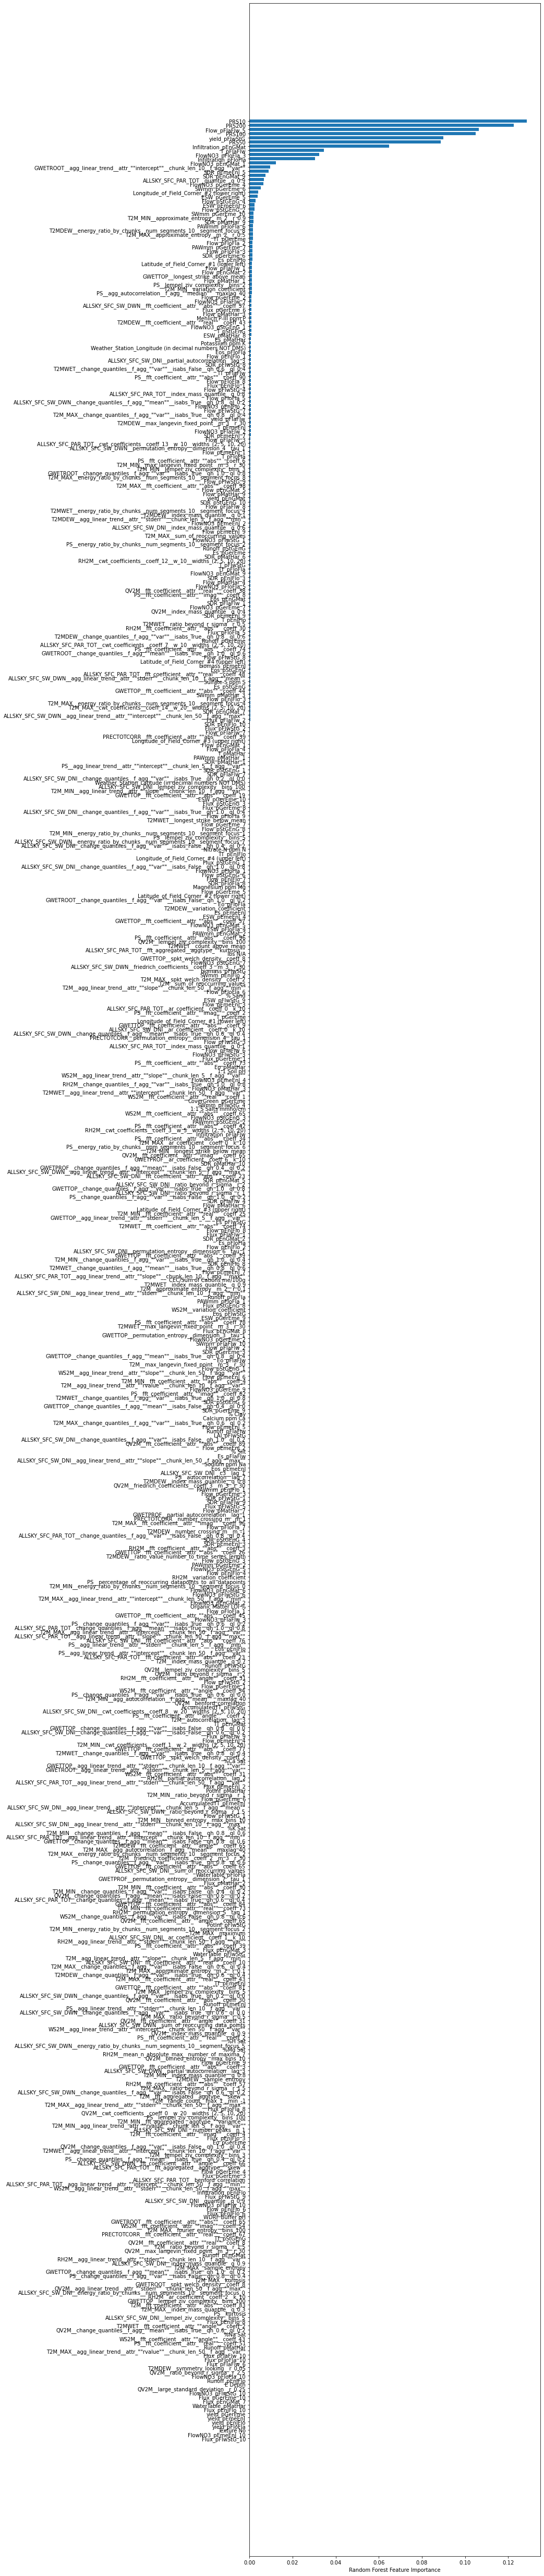

In [246]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10, 90))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [247]:
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 60))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

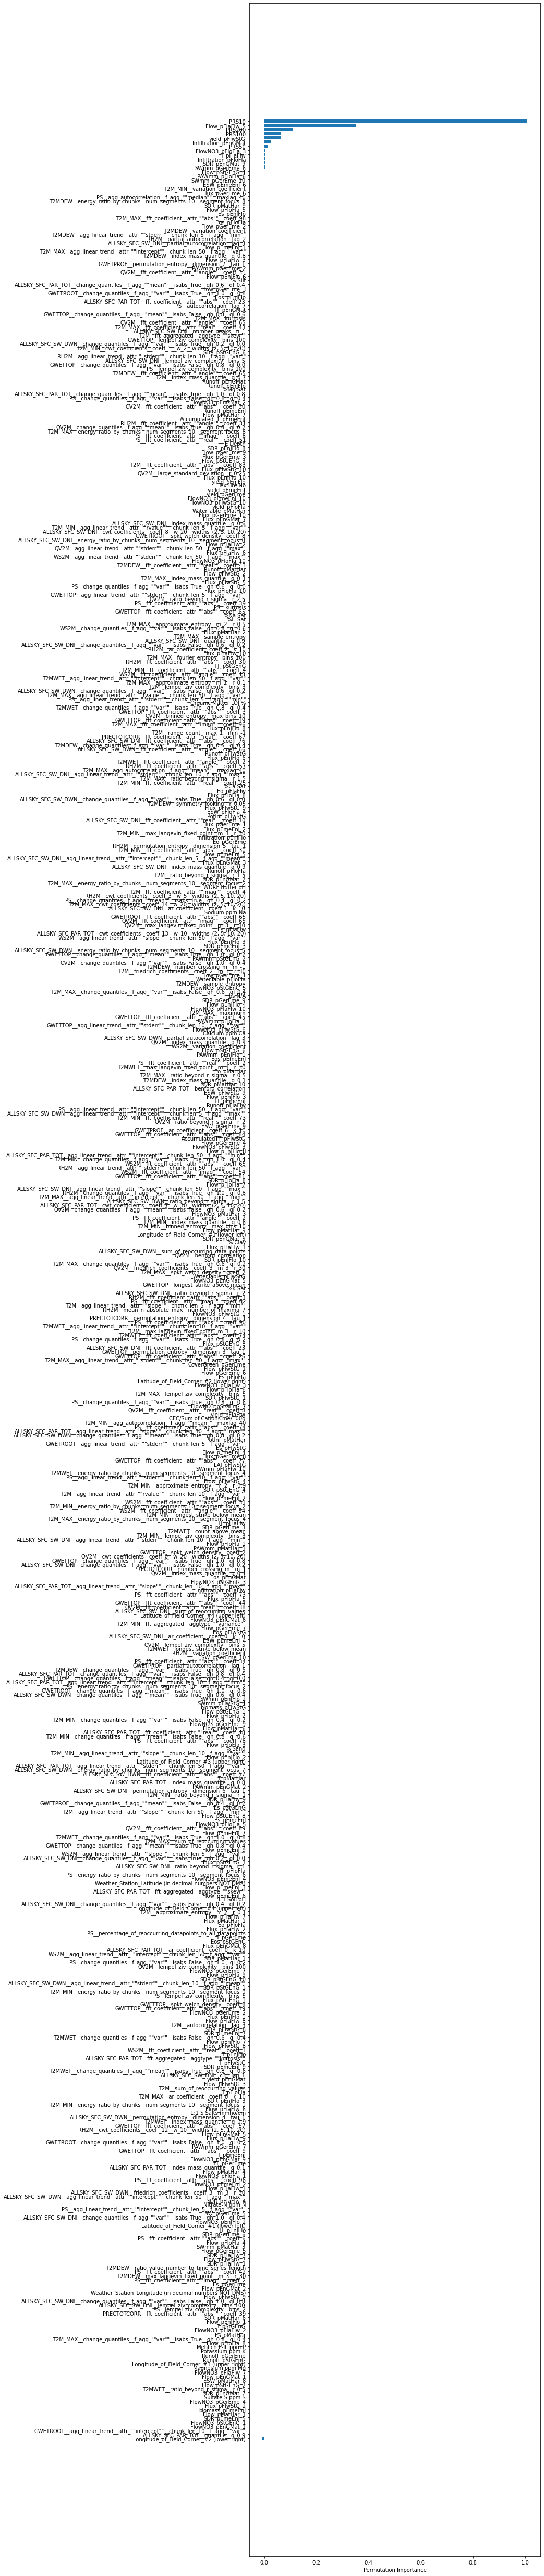

In [248]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 90))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [278]:
data['Train_Test'] = 'Train'
data.loc[data['Yield_Mg_ha'].isna(),'Train_Test'] = 'Test'

In [290]:
data

Env             Hybrid  Yield_Mg_ha      PRS200       PRS100  \
0       DEH1_2014        M0088/LH185     5.721725  441.524975  1852.546540   
1       DEH1_2014        M0143/LH185    11.338246  450.555374  1949.208792   
2       DEH1_2014        M0003/LH185     6.540810  451.028203  1755.531894   
3       DEH1_2014        M0035/LH185    10.366857  452.804349  1980.824891   
4       DEH1_2014        M0052/LH185    10.908814  441.183323  1693.344565   
...           ...                ...          ...         ...          ...   
139717  WIH3_2022  W10010_0337/LH244          NaN  381.731631  1639.294802   
139718  WIH3_2022  W10010_0346/LH244          NaN  408.220533  1691.942195   
139719  WIH3_2022  W10010_0358/LH244          NaN  319.200269  1126.435071   
139720  WIH3_2022  W10010_0381/LH244          NaN  347.768656  1122.542646   
139721  WIH3_2022  W10010_0452/LH244          NaN  318.542744  1198.018185   

              PRS50         PRS10 Treatment        City Field  ...  \
0       5571.500508  -8739.188012       NaN  Georgetown  27AB  ...   
1       5347.497980  -9374.159419       NaN  Georgetown  27AB  ...   
2       5316.643443  -9204.929783       NaN  Georgetown  27AB  ...   
3       5717.197804  -8408.219593       NaN  Georgetown  27AB  ...   
4       4754.723237 -10215.427794       NaN  Georgetown  27AB  ...   
...             ...           ...       ...         ...   ...  ...   
139717  3859.270762 -12002.628374  Standard     Hancock   K25  ...   
139718  3508.223468 -11939.132327  Standard     Hancock   K25  ...   
139719  3124.837243 -12464.929438  Standard     Hancock   K25  ...   
139720  2656.649600 -13239.905965  Standard     Hancock   K25  ...   
139721  3513.207334 -11452.374438  Standard     Hancock   K25  ...   

       QV2M__fft_coefficient__attr_""abs""__coeff_30  \
0                                          55.795072   
1                                          55.795072   
2                                          55.795072   
3                                          55.795072   
4                                          55.795072   
...                                              ...   
139717                                      1.184932   
139718                                      1.184932   
139719                                      1.184932   
139720                                      1.184932   
139721                                      1.184932   

       T2M_MIN__index_mass_quantile__q_0.8  \
0                                 0.712329   
1                                 0.712329   
2                                 0.712329   
3                                 0.712329   
4                                 0.712329   
...                                    ...   
139717                            0.815287   
139718                            0.815287   
139719                            0.815287   
139720                            0.815287   
139721                            0.815287   

        WS2M__fft_coefficient__attr_""abs""__coeff_31  \
0                                            5.587170   
1                                            5.587170   
2                                            5.587170   
3                                            5.587170   
4                                            5.587170   
...                                               ...   
139717                                       1.182695   
139718                                       1.182695   
139719                                       1.182695   
139720                                       1.182695   
139721                                       1.182695   

        PRECTOTCORR__fft_coefficient__attr_""abs""__coeff_39  \
0                                               94.039923      
1                                               94.039923      
2                                               94.039923      
3                                               94.039923      
4    

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94211/3195222850.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


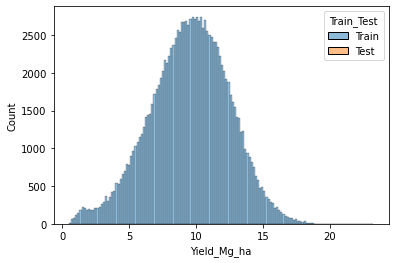

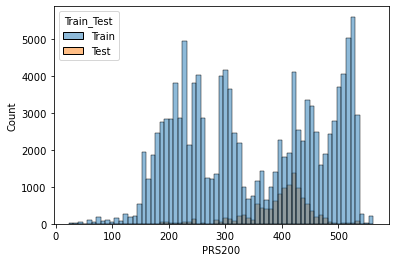

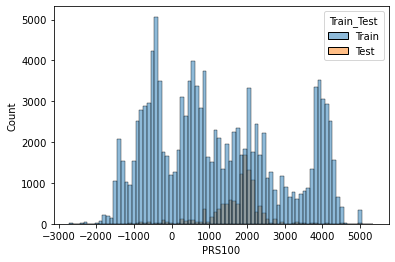

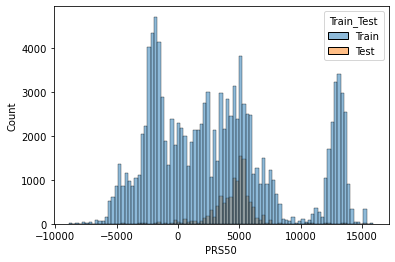

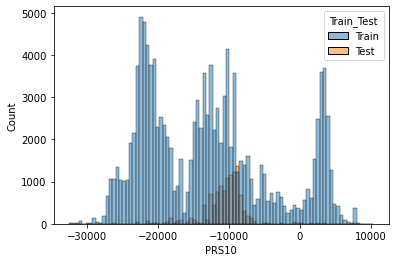

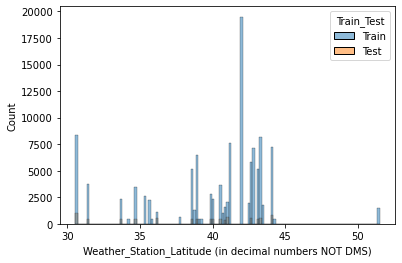

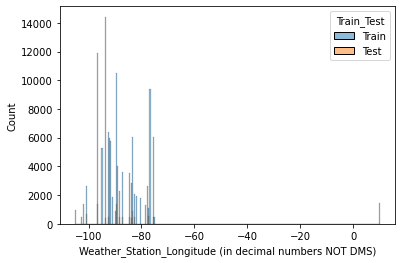

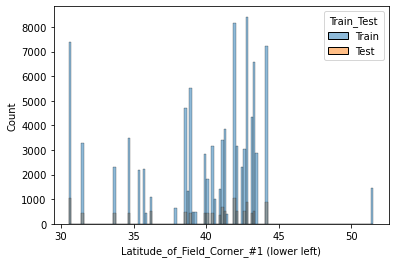

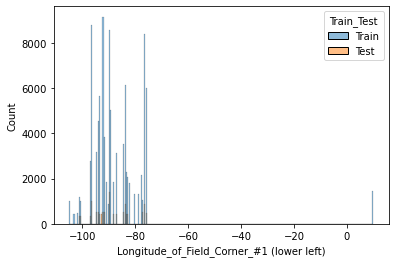

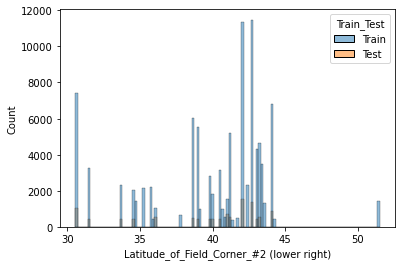

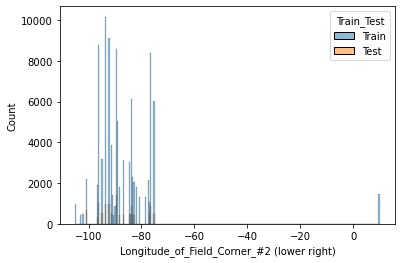

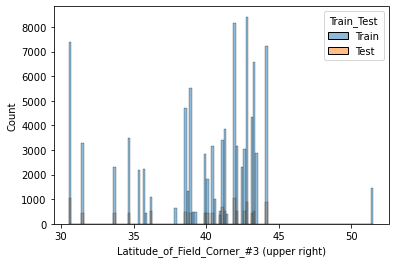

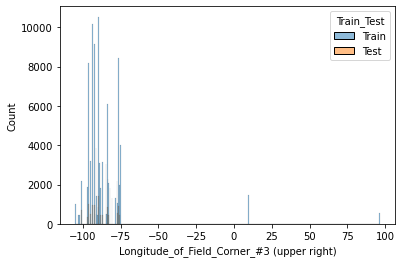

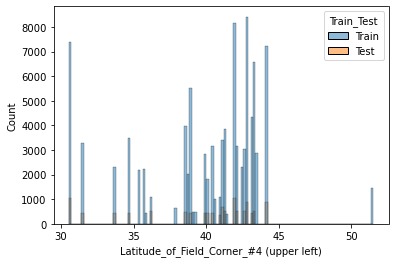

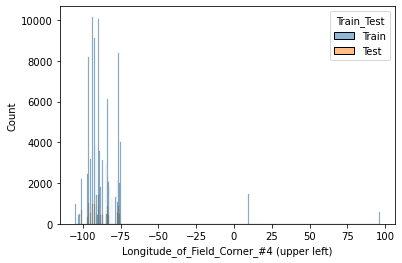

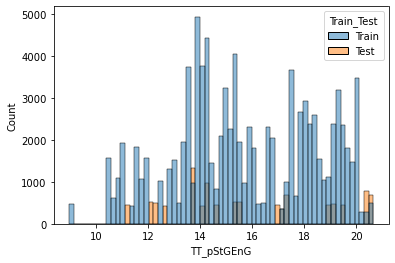

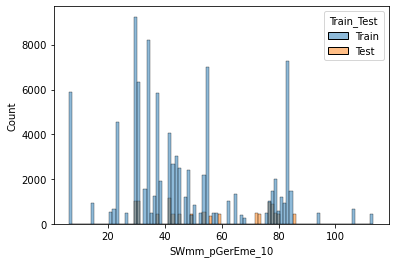

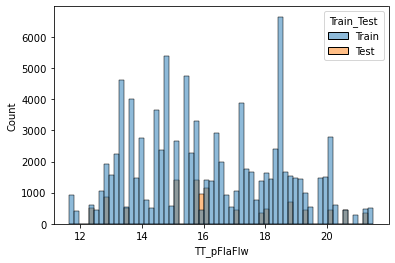

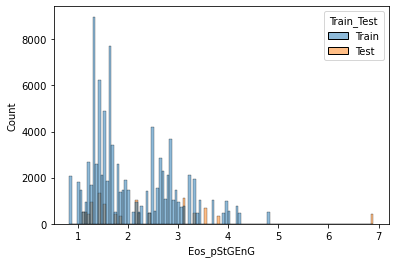

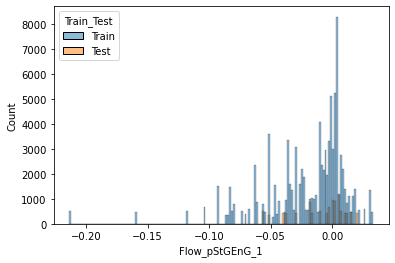

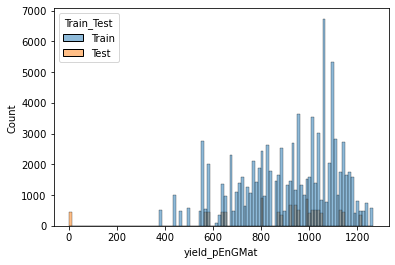

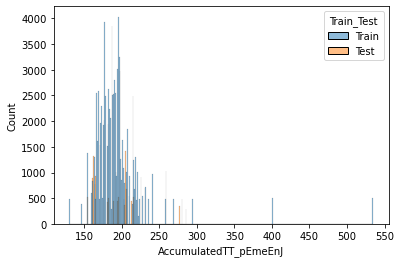

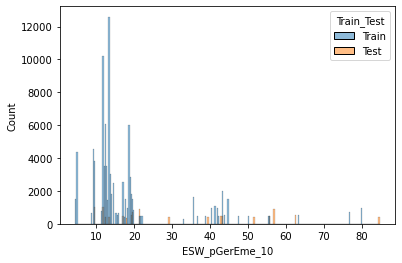

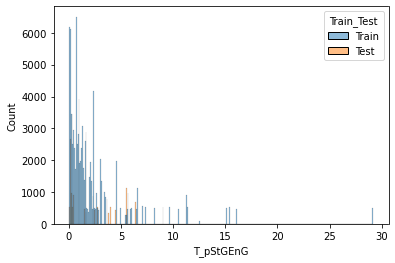

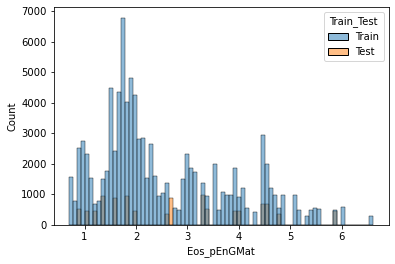

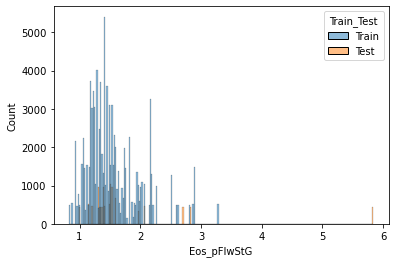

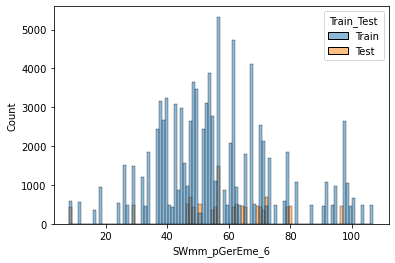

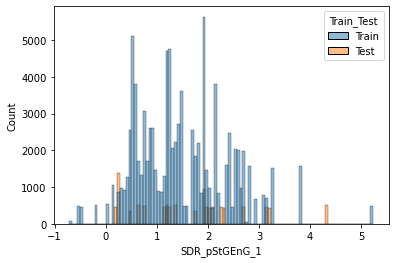

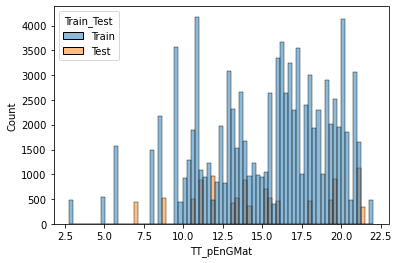

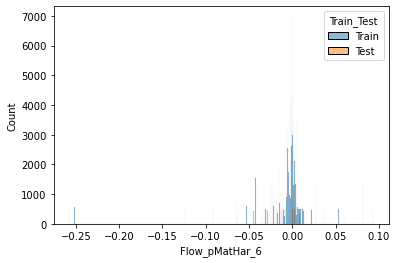

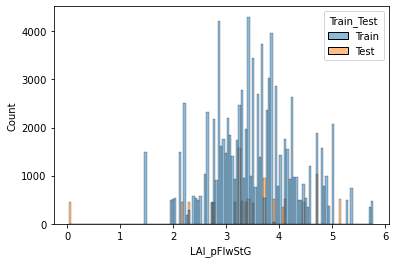

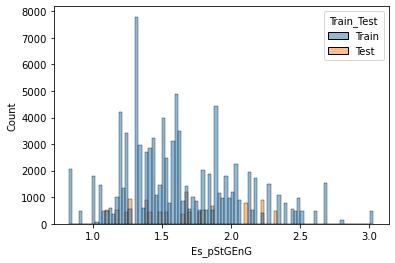

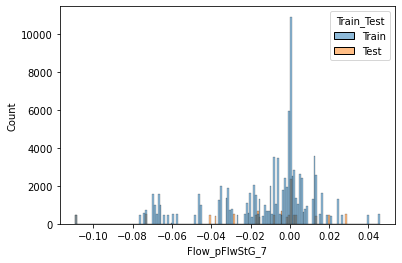

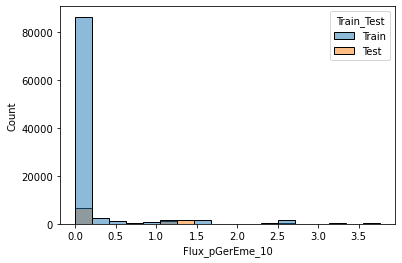

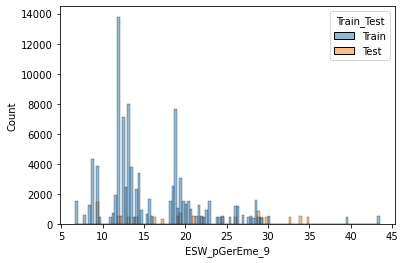

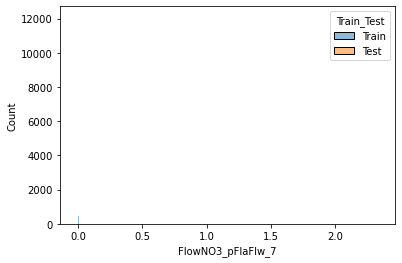

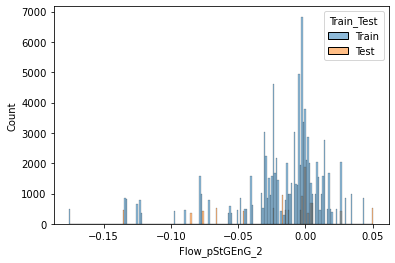

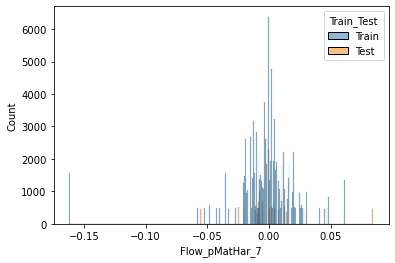

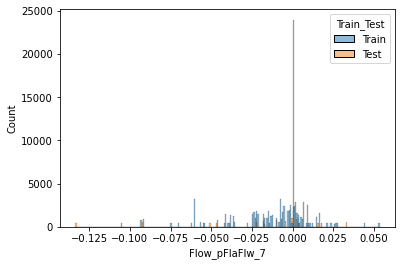

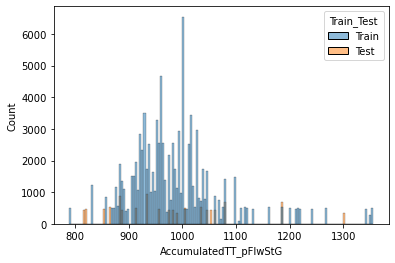

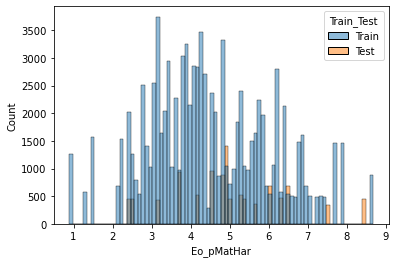

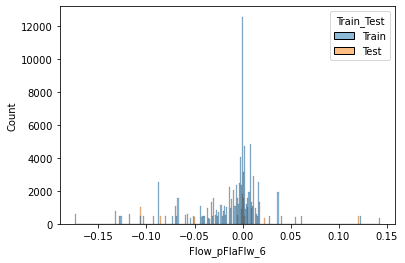

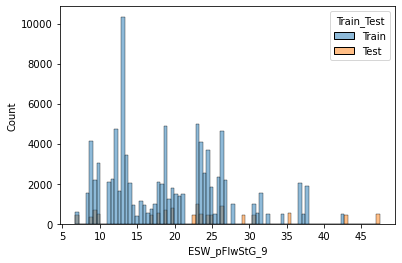

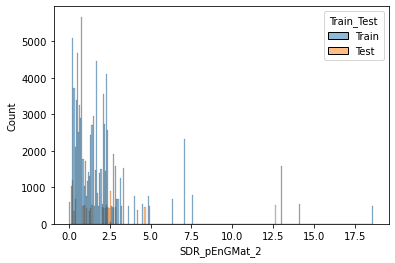

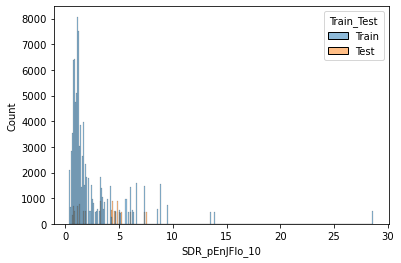

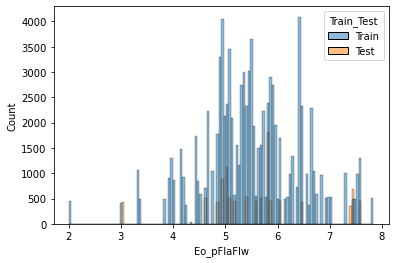

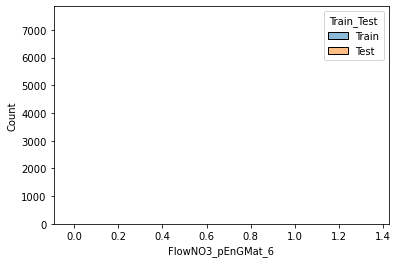

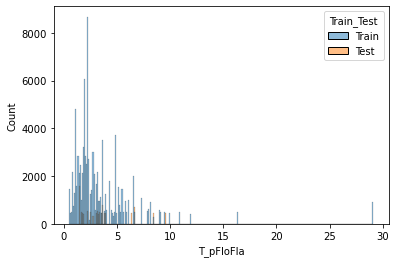

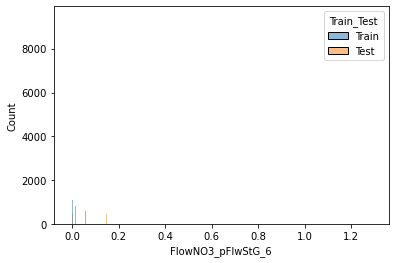

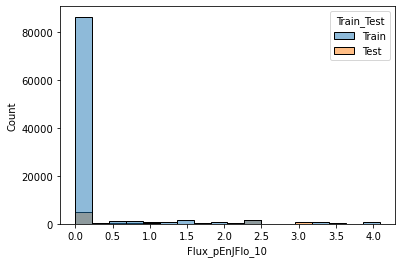

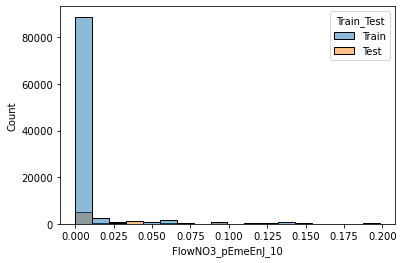

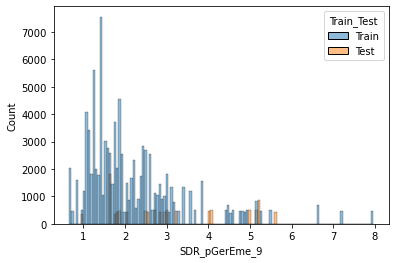

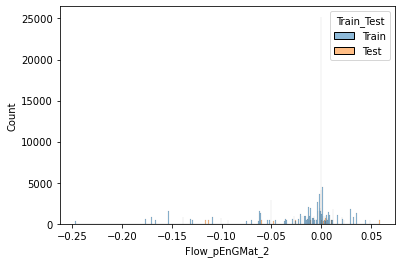

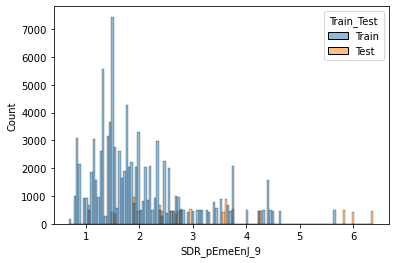

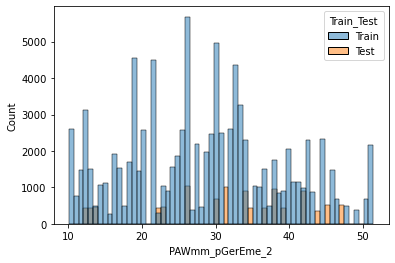

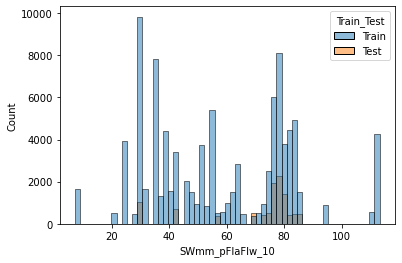

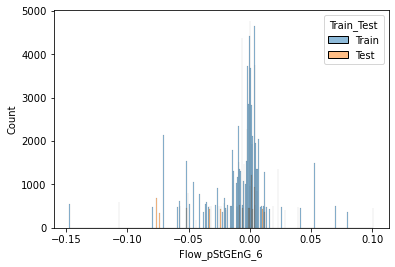

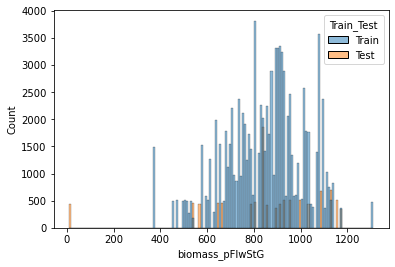

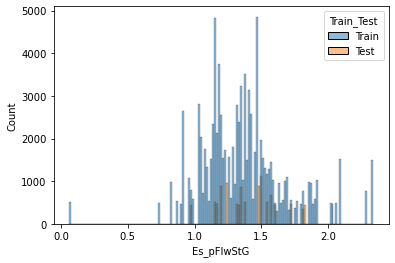

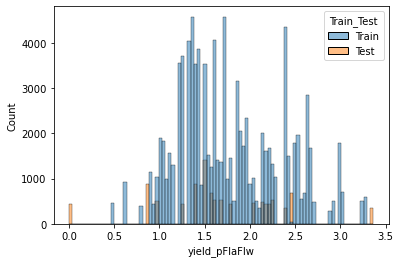

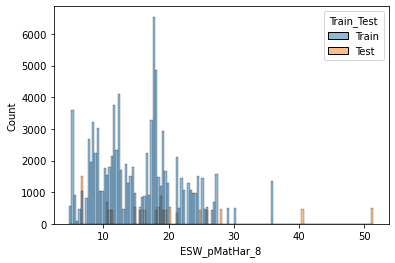

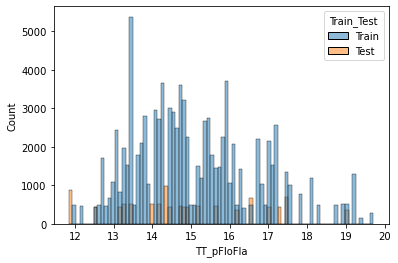

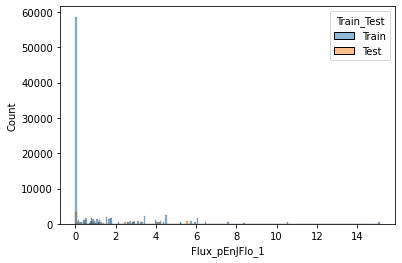

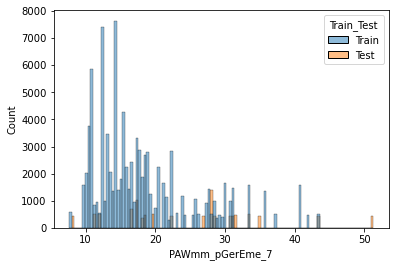

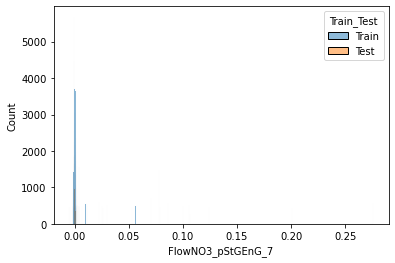

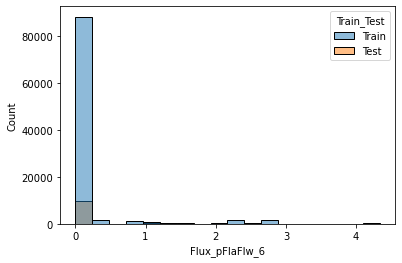

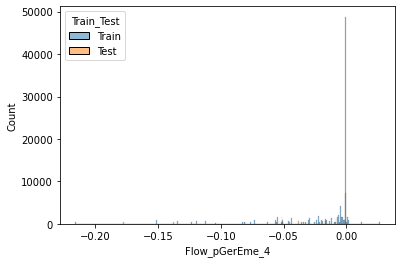

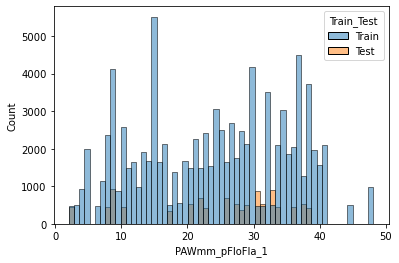

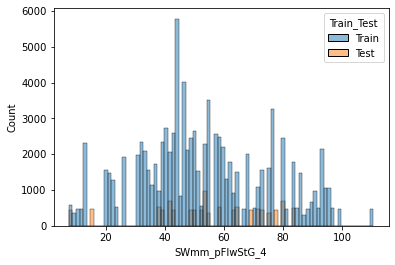

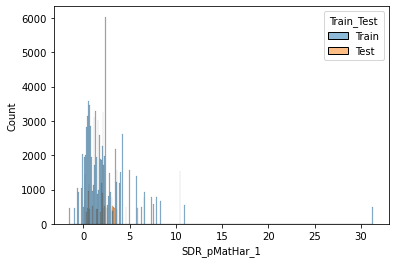

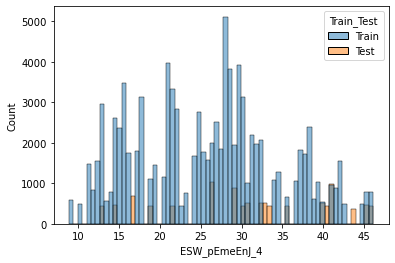

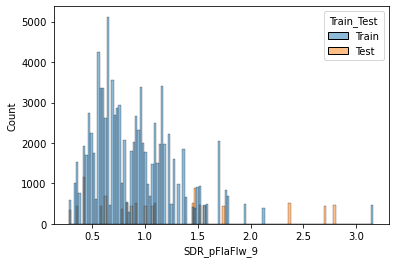

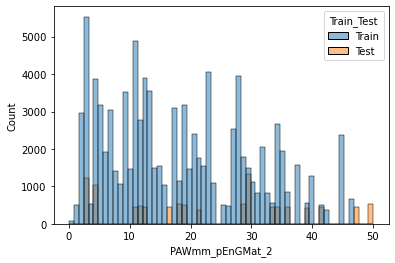

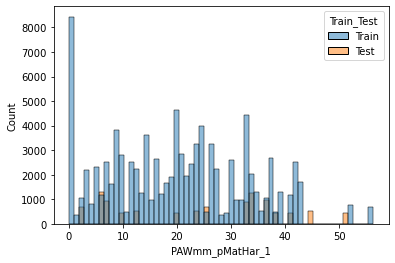

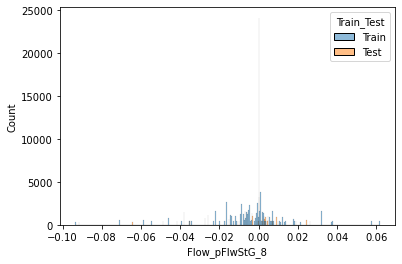

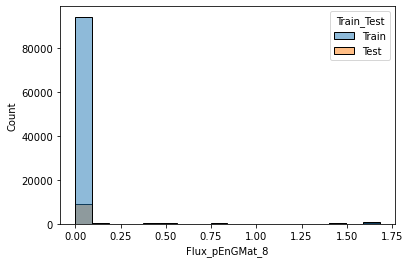

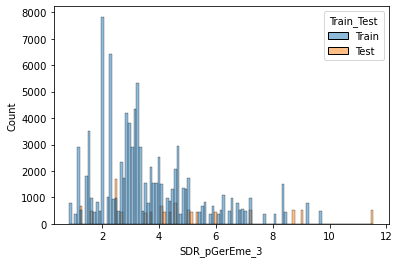

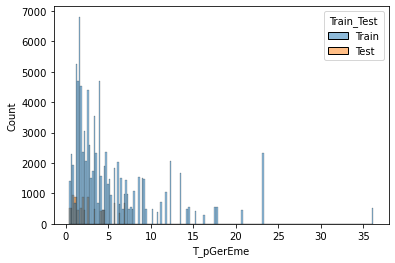

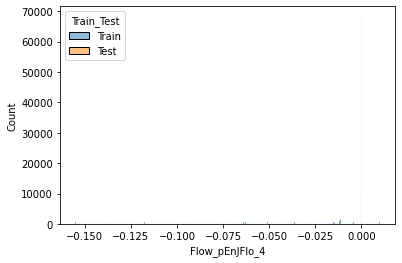

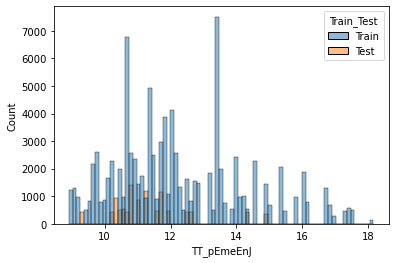

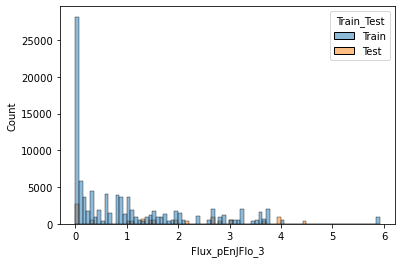

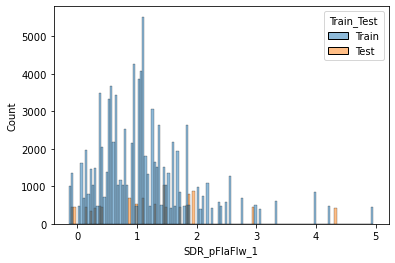

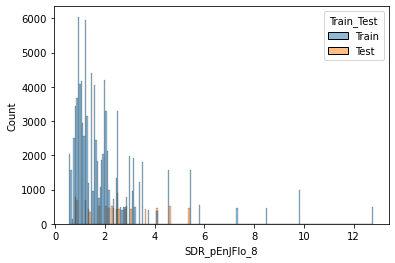

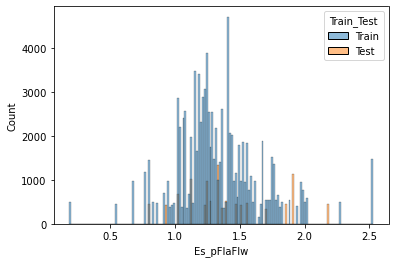

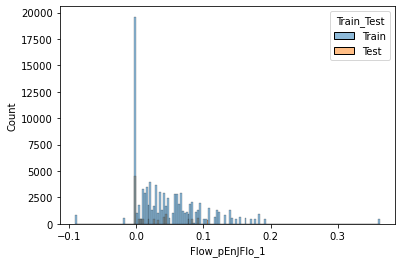

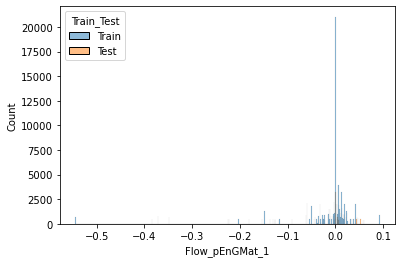

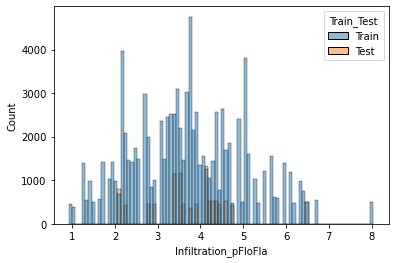

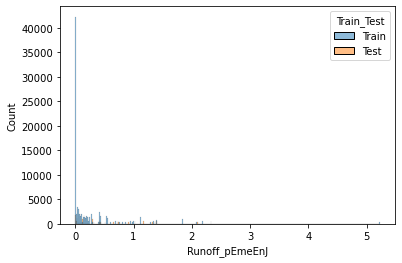

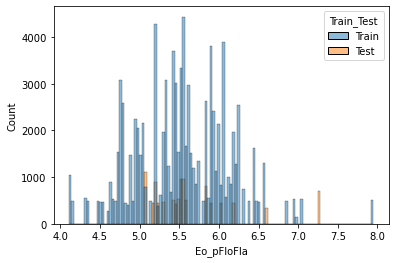

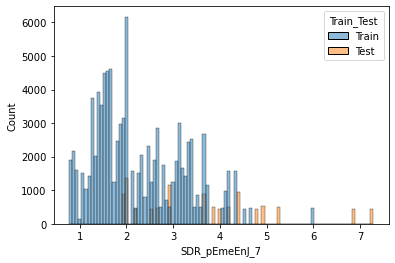

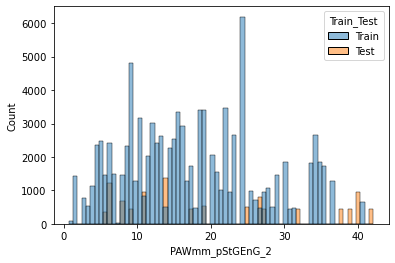

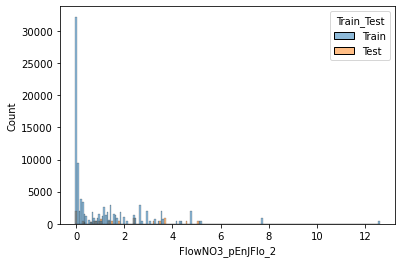

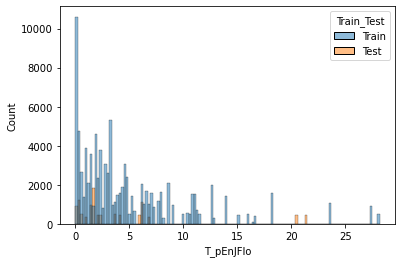

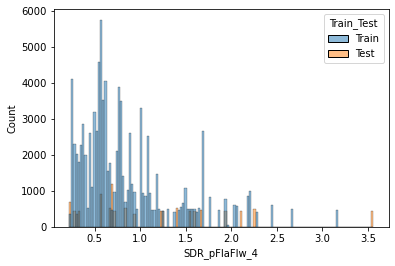

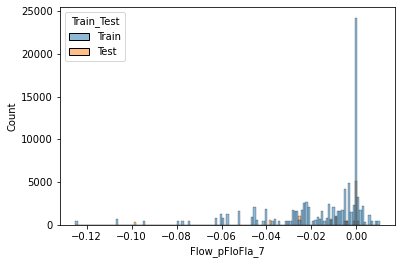

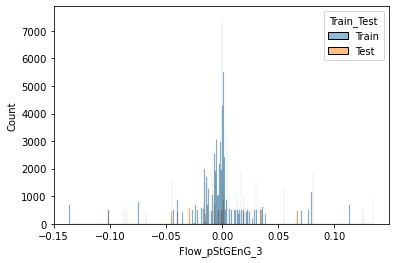

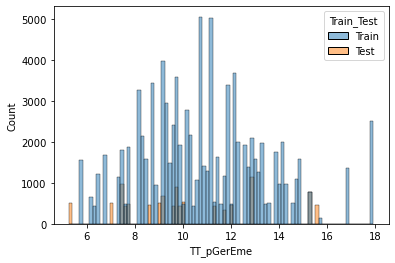

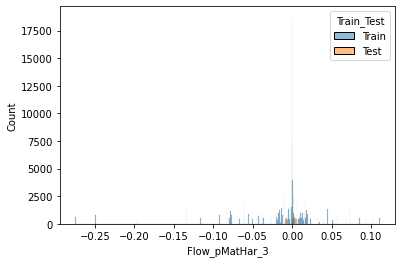

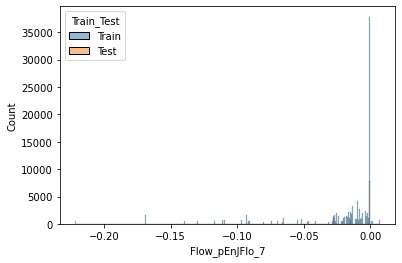

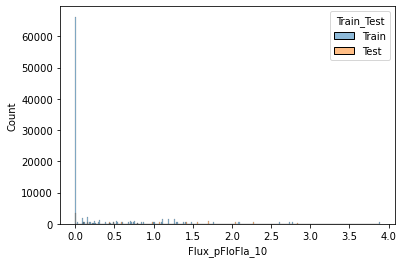

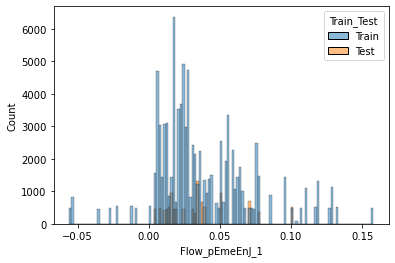

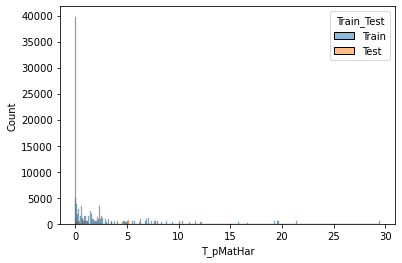

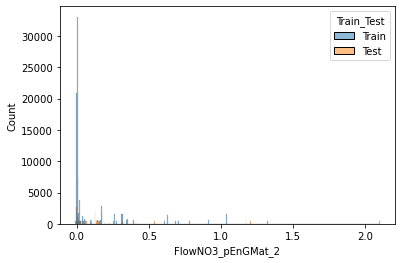

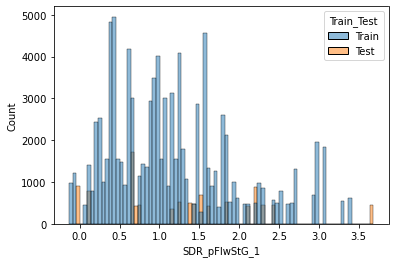

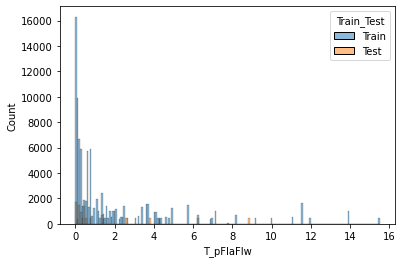

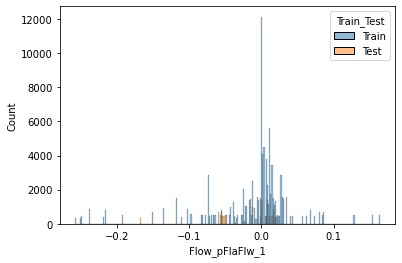

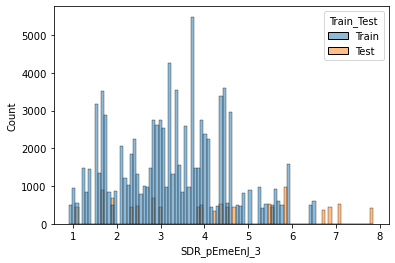

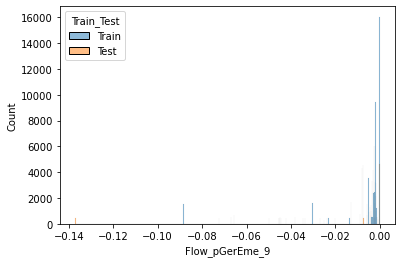

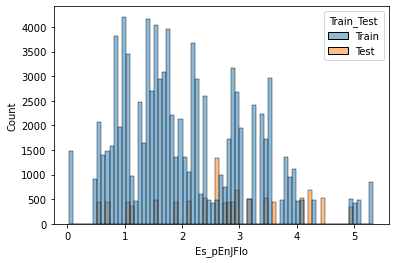

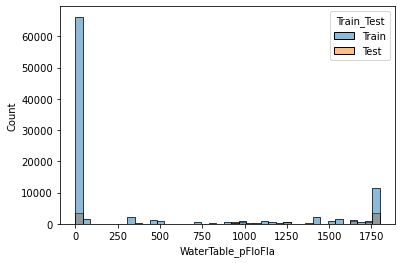

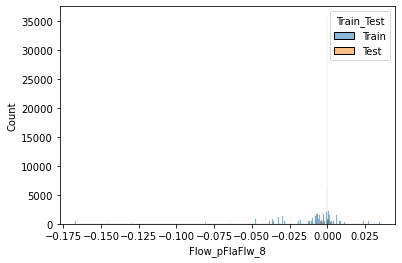

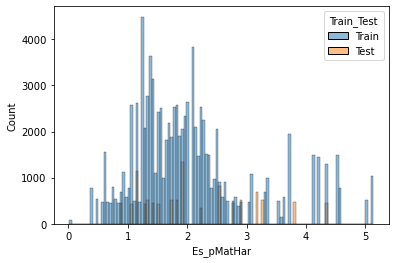

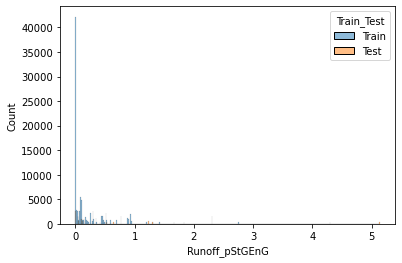

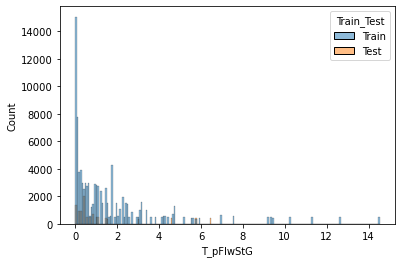

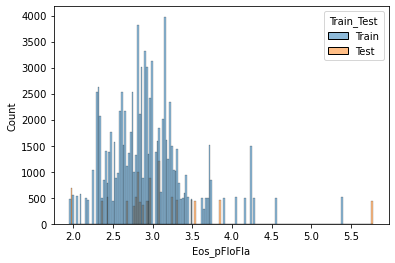

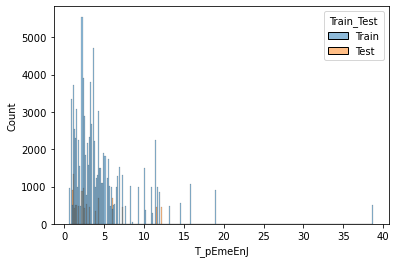

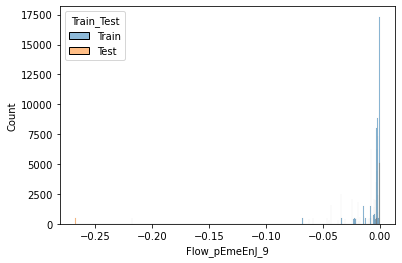

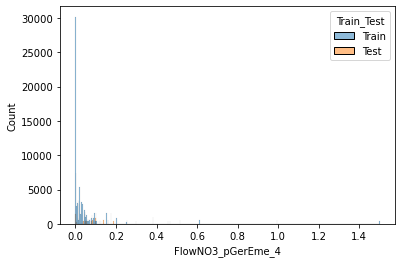

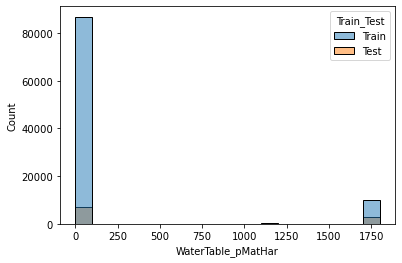

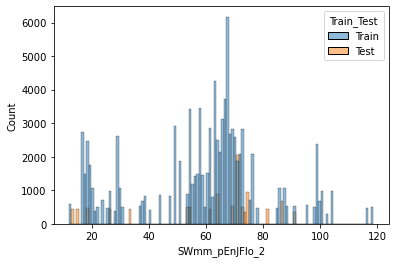

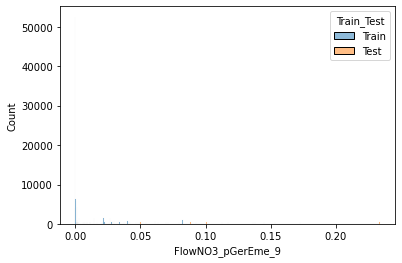

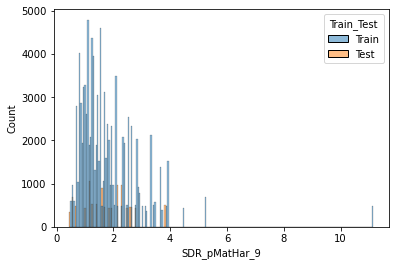

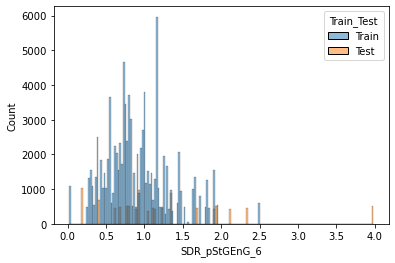

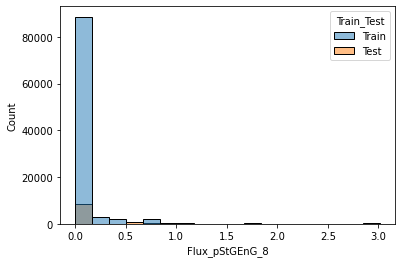

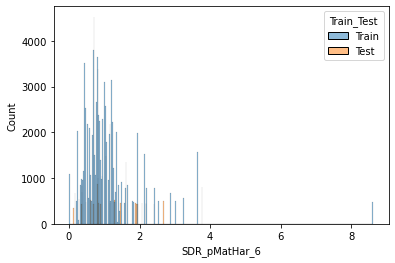

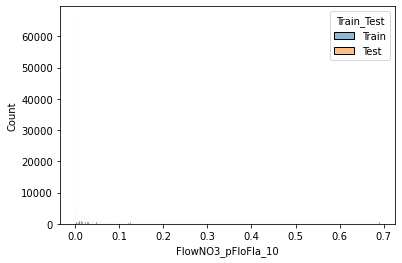

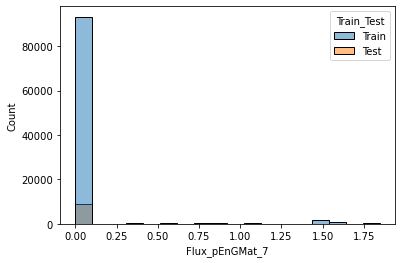

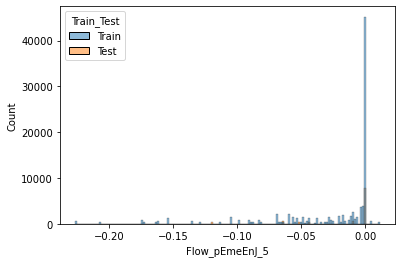

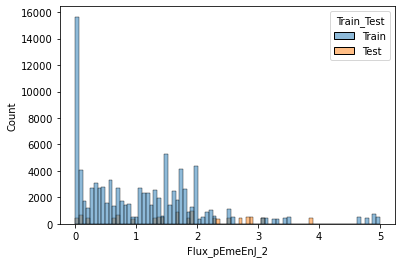

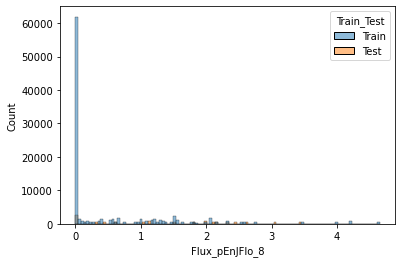

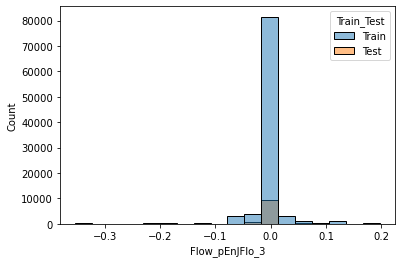

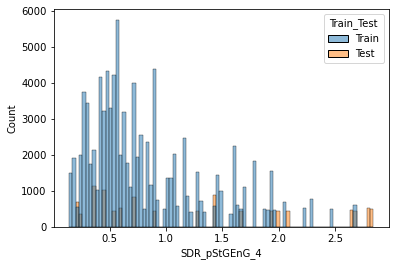

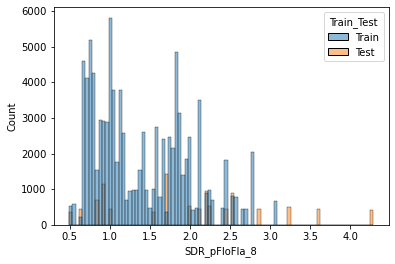

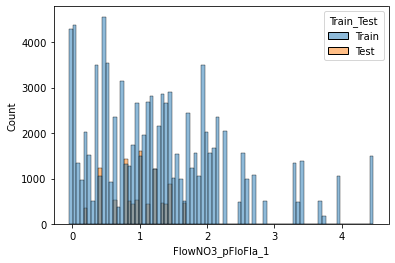

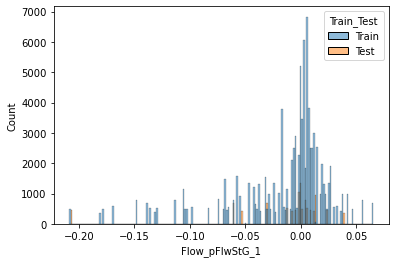

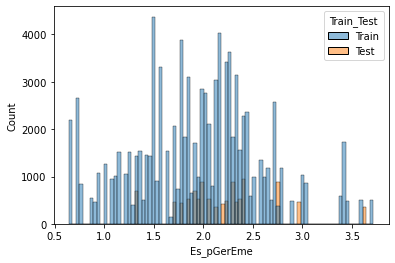

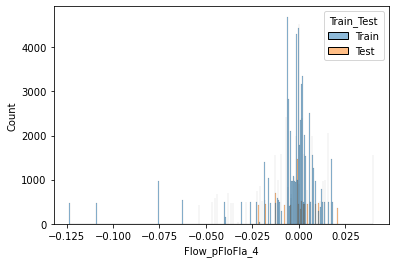

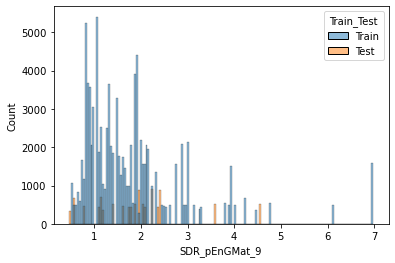

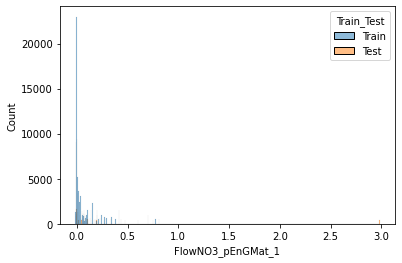

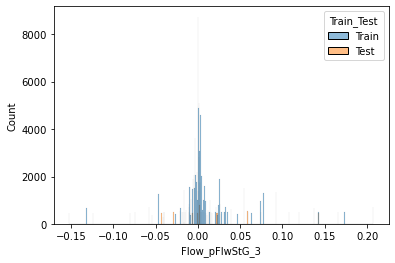

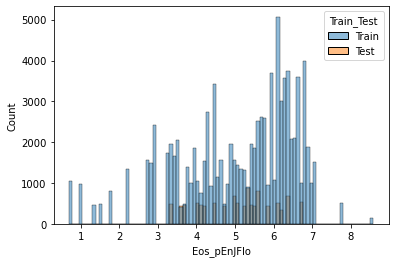

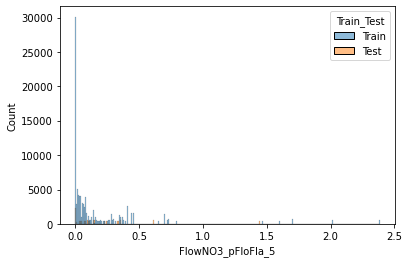

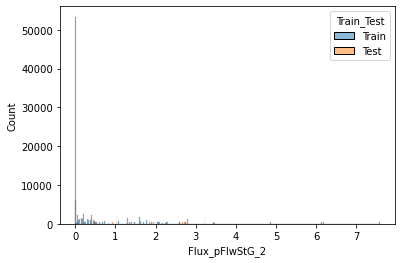

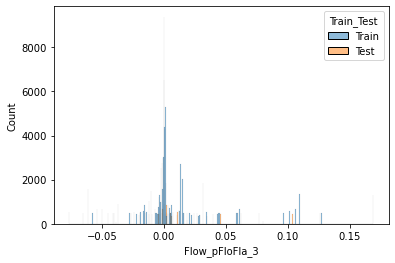

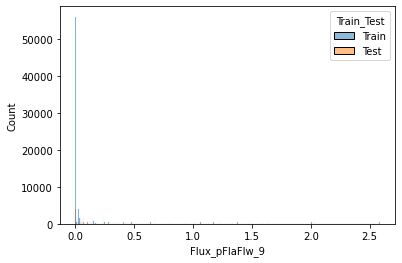

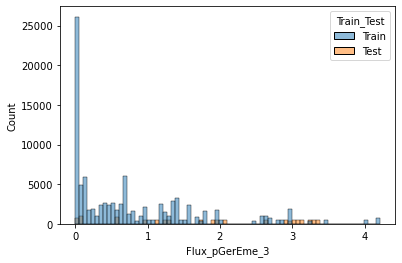

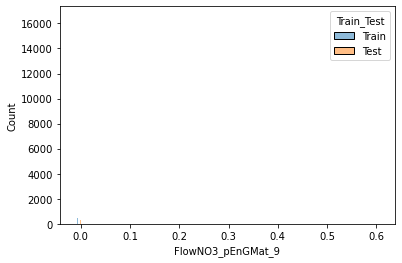

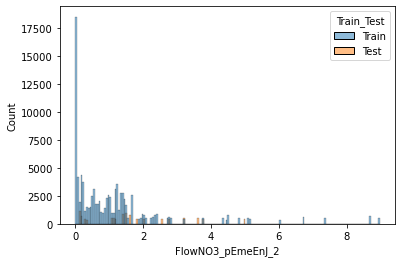

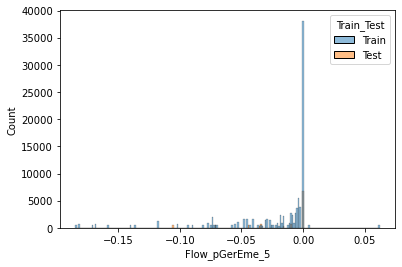

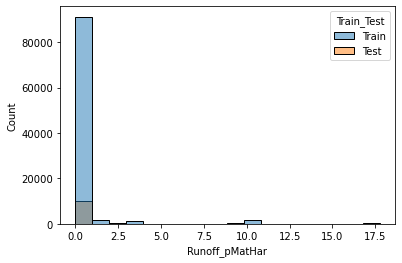

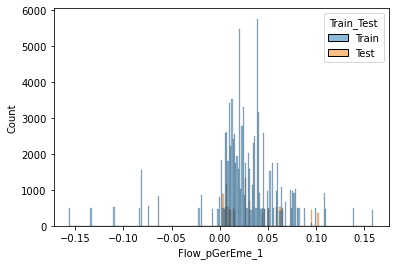

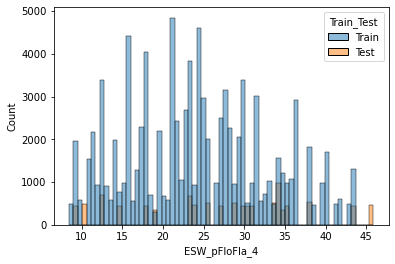

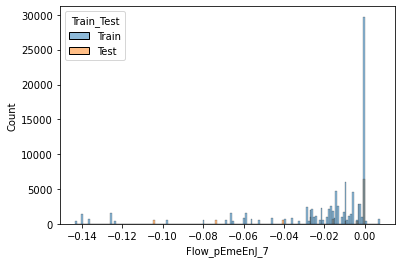

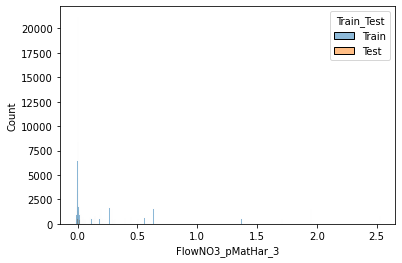

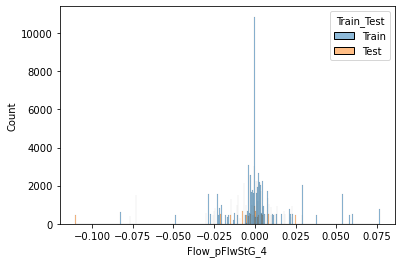

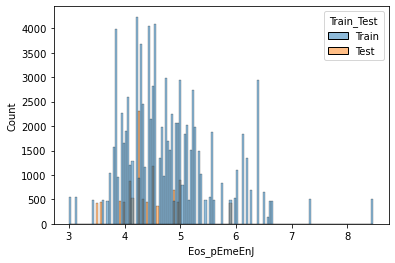

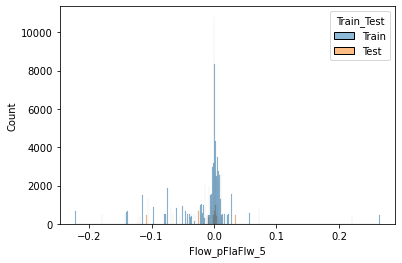

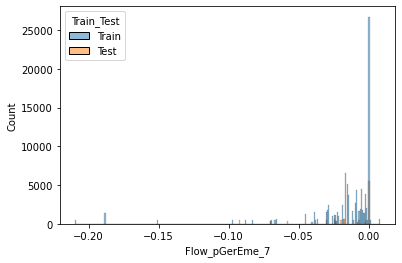

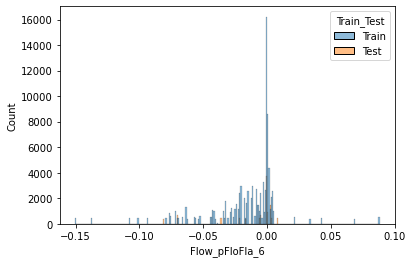

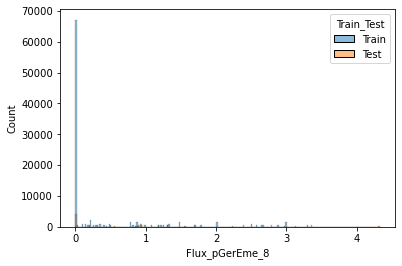

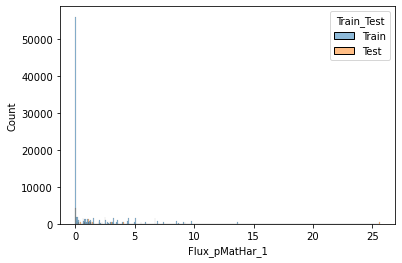

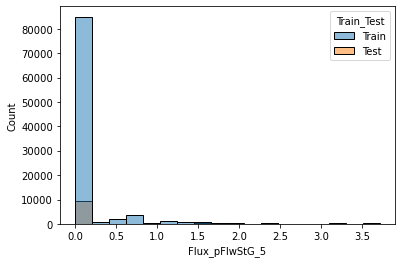

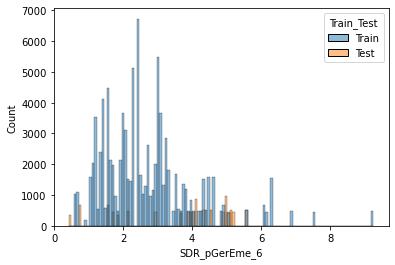

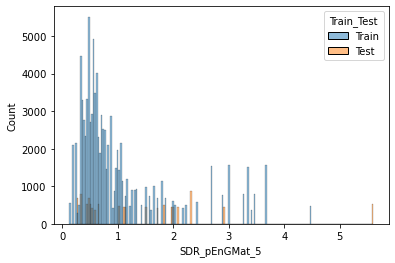

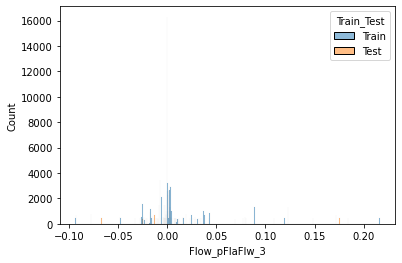

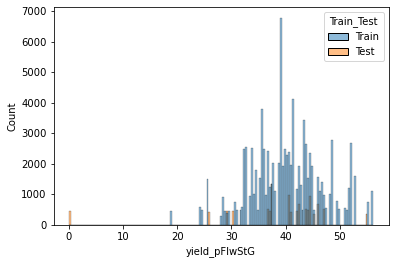

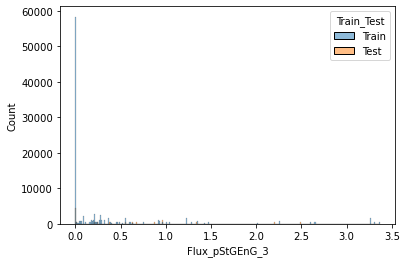

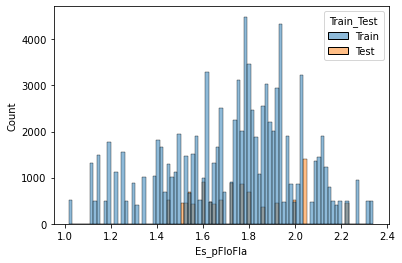

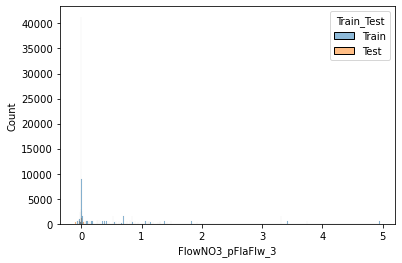

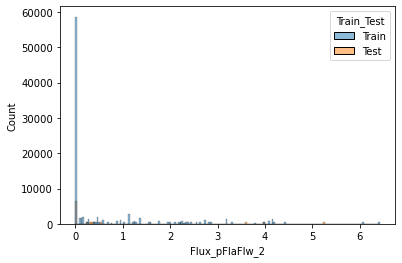

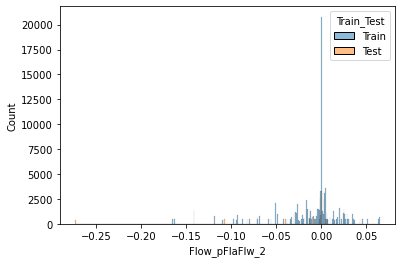

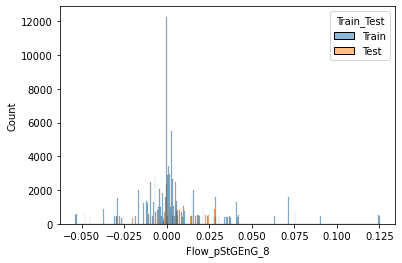

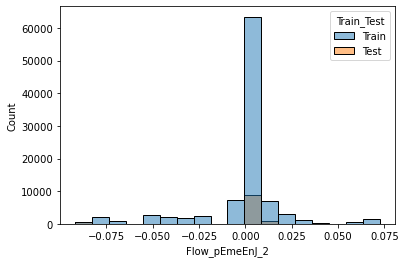

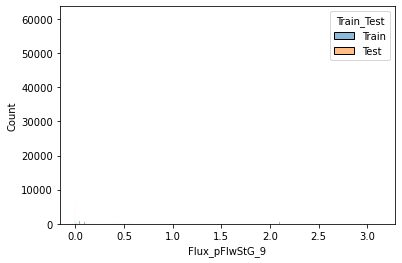

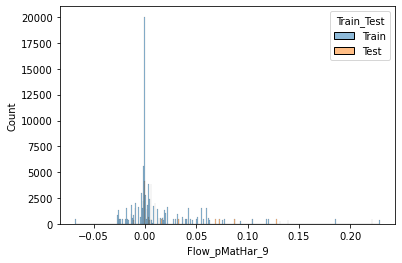

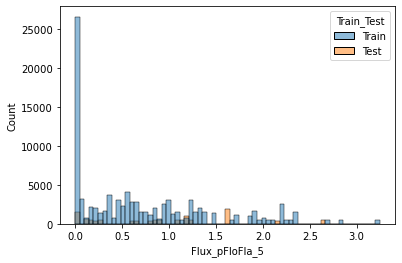

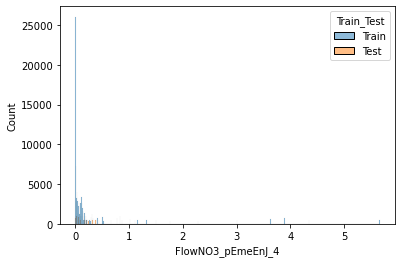

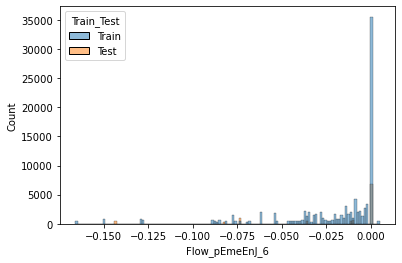

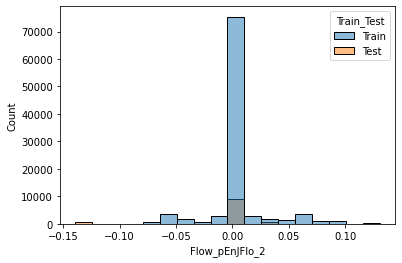

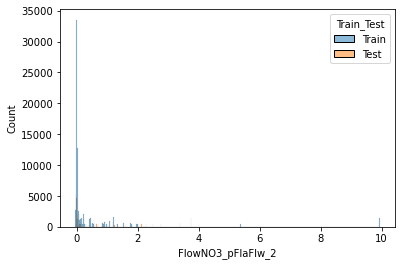

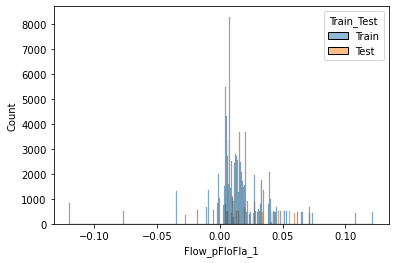

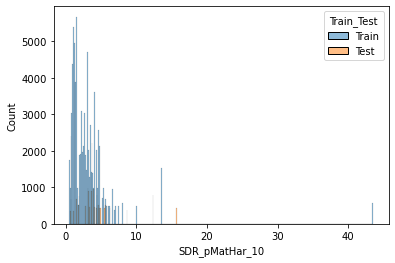

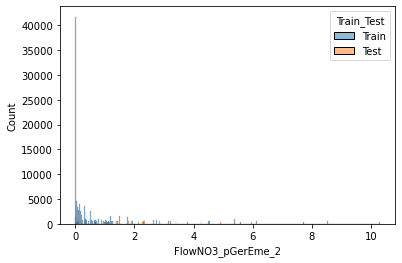

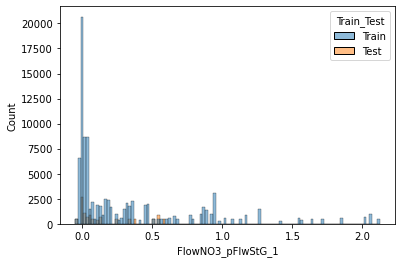

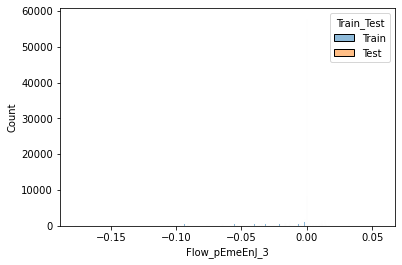

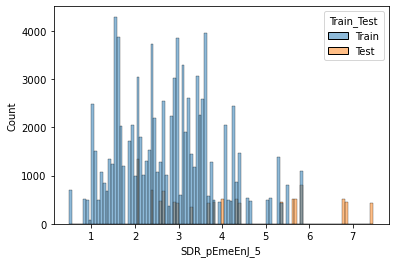

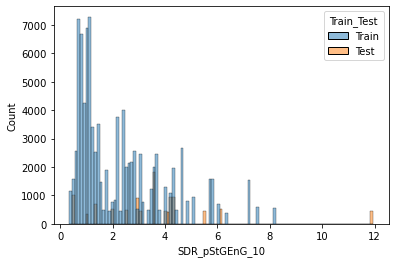

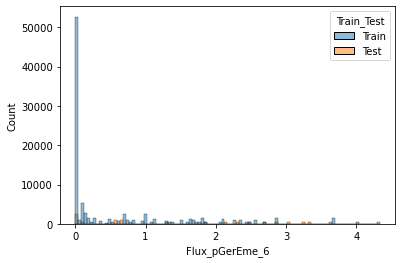

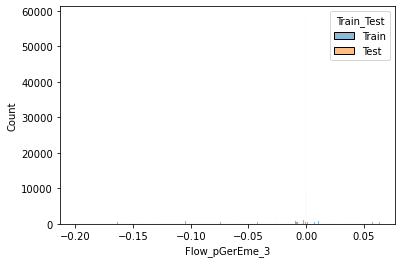

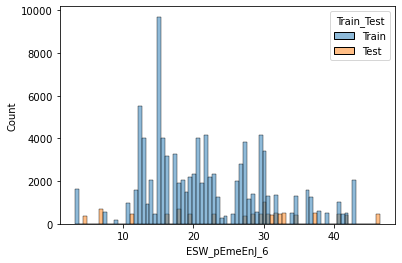

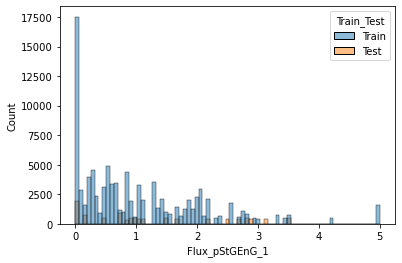

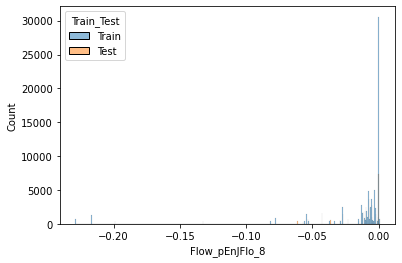

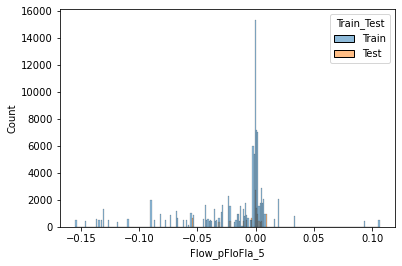

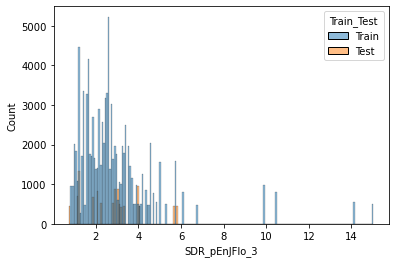

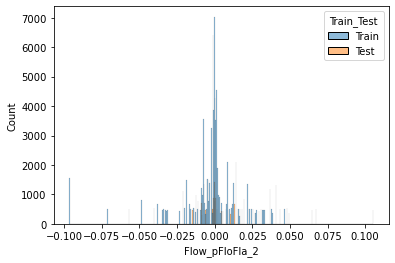

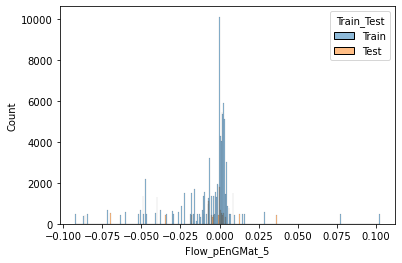

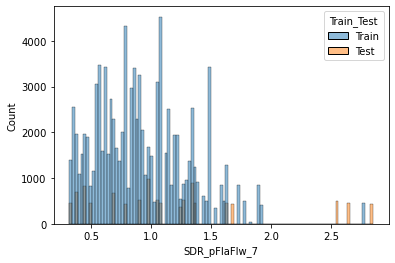

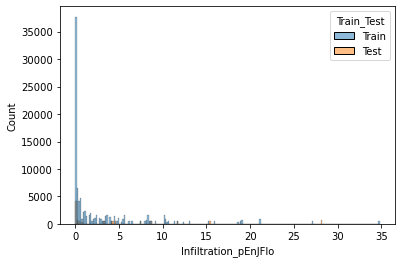

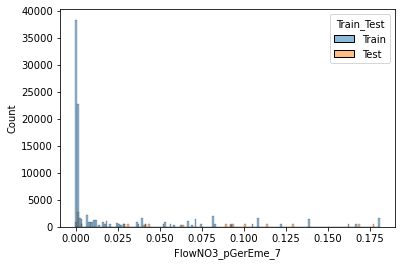

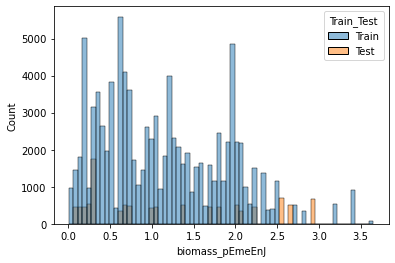

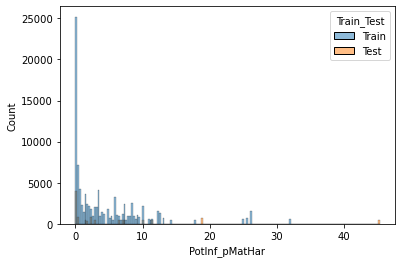

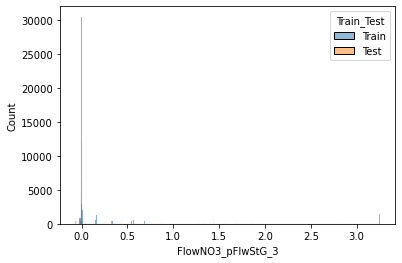

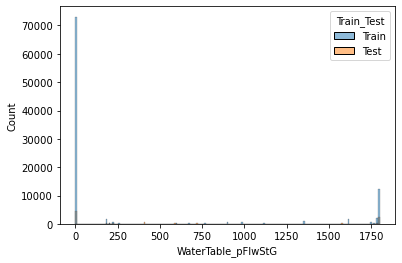

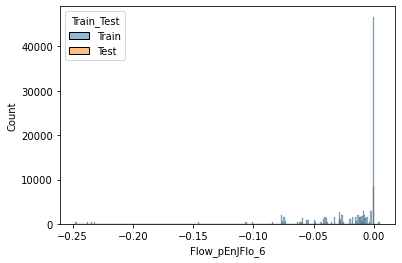

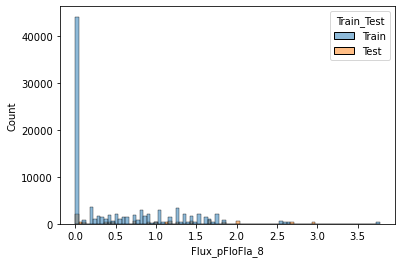

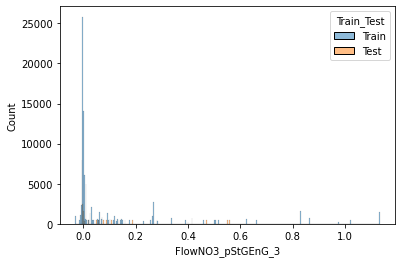

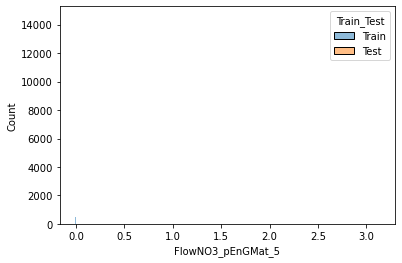

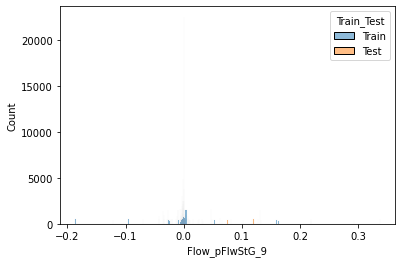

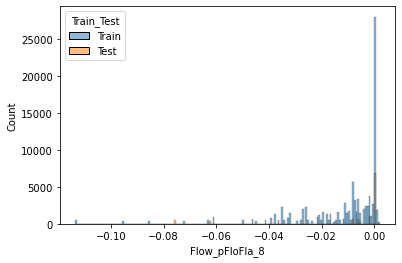

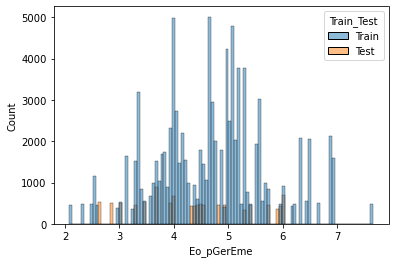

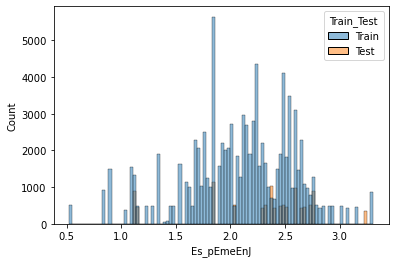

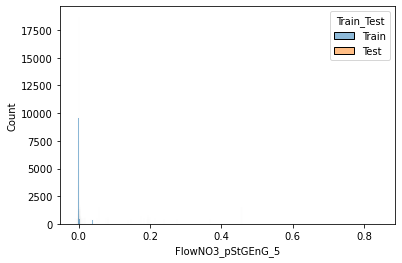

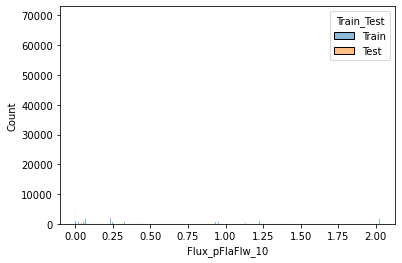

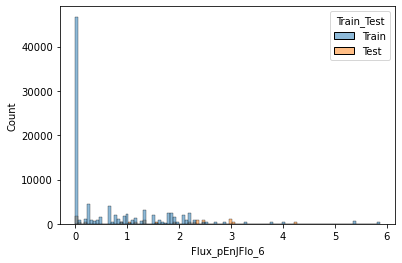

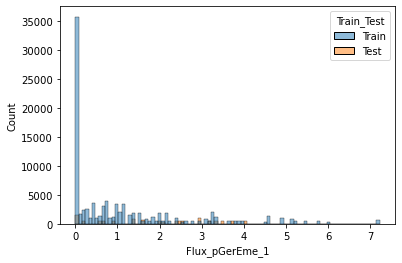

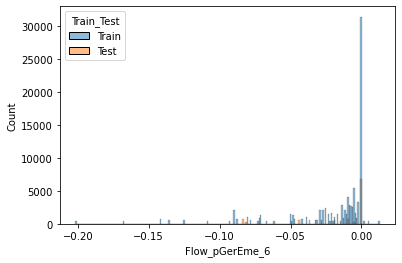

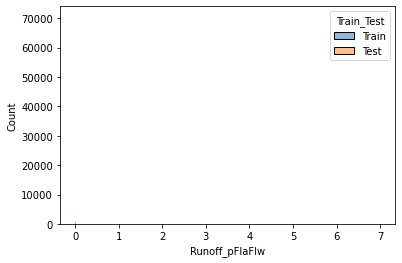

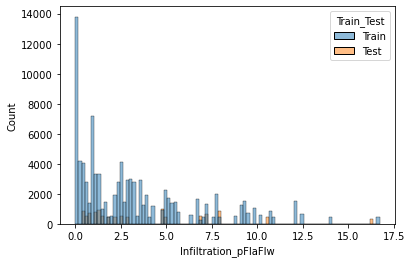

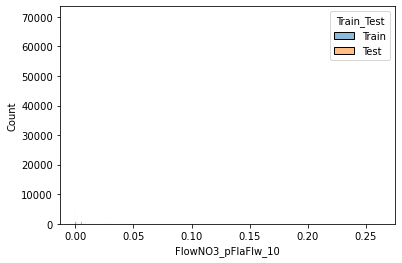

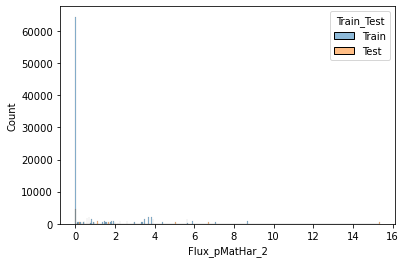

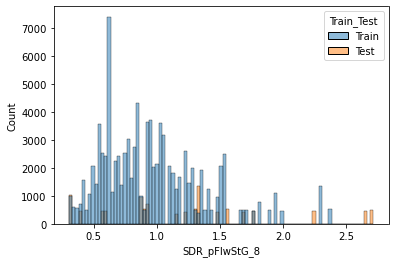

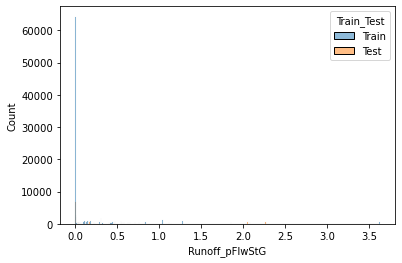

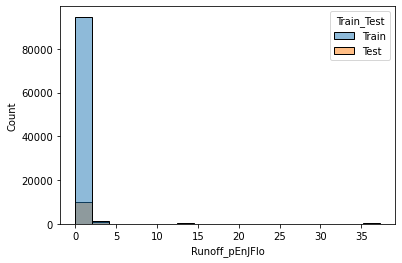

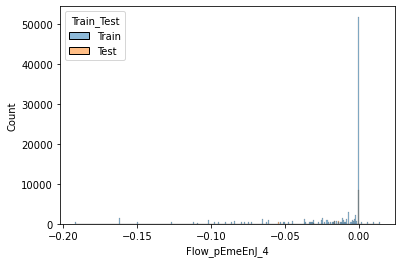

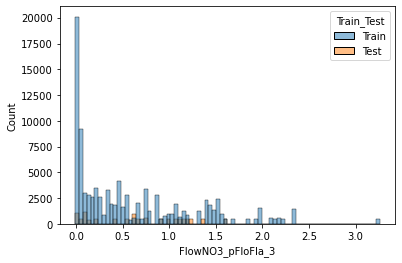

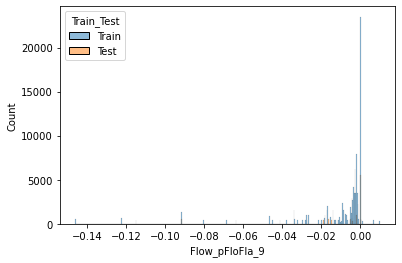

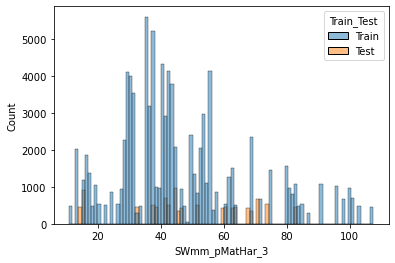

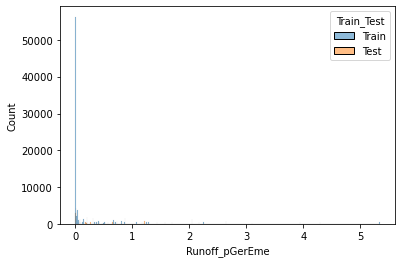

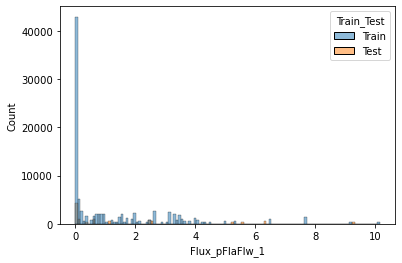

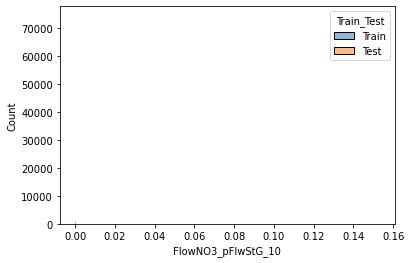

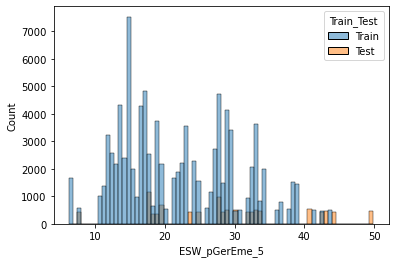

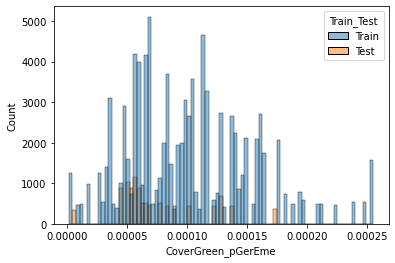

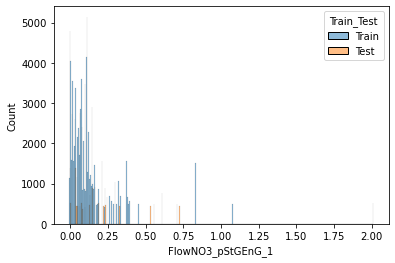

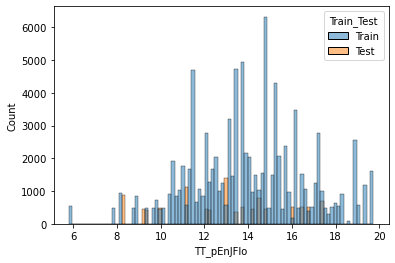

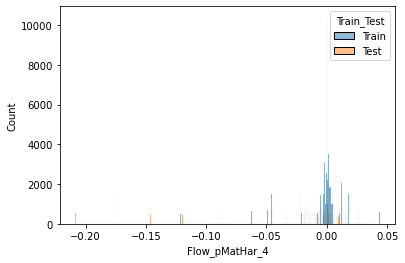

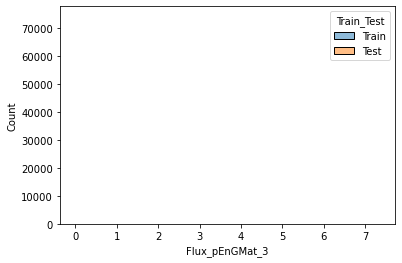

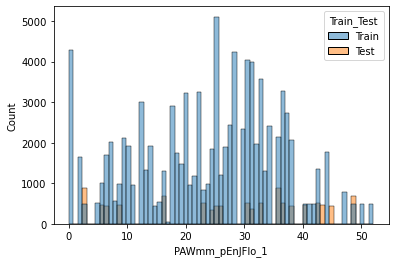

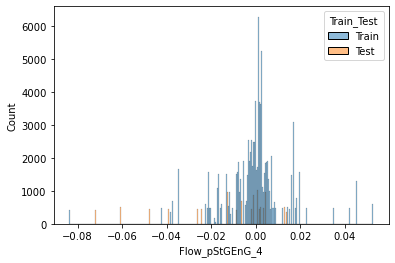

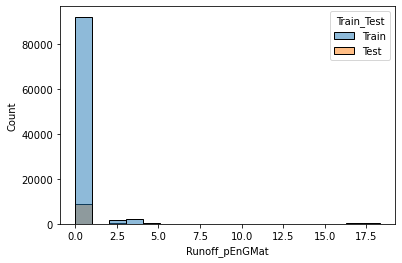

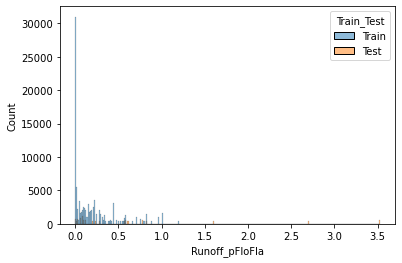

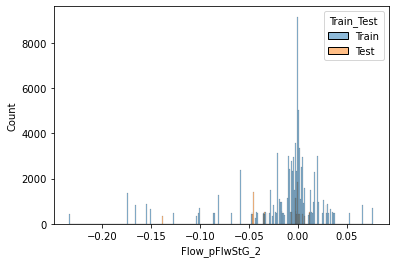

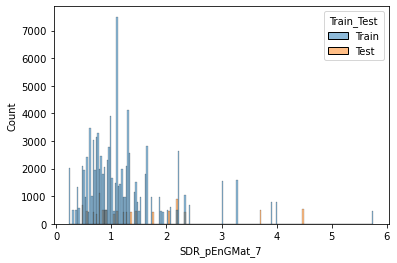

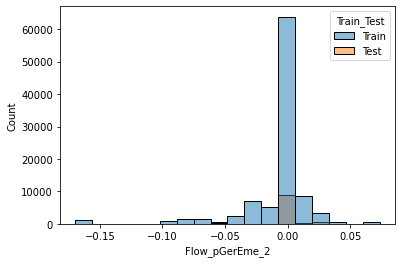

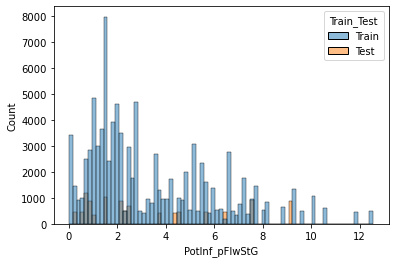

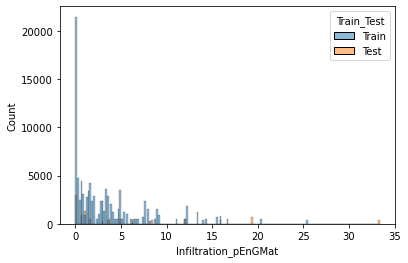

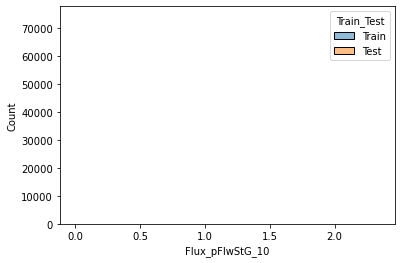

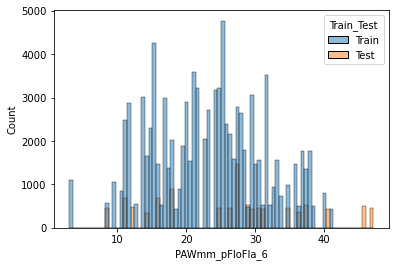

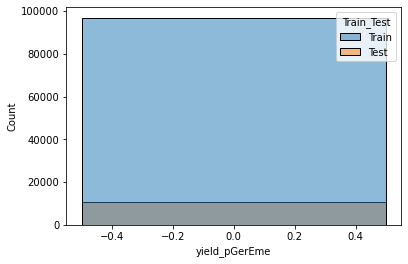

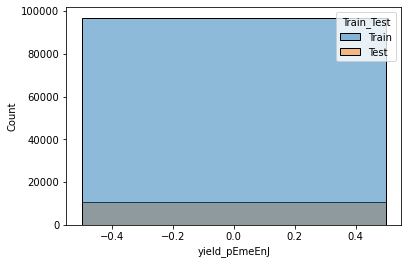

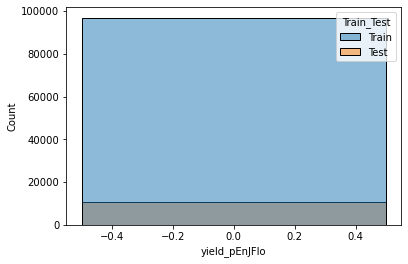

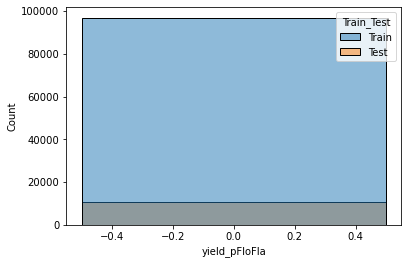

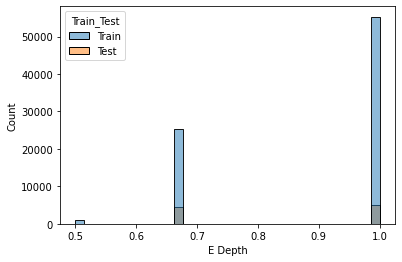

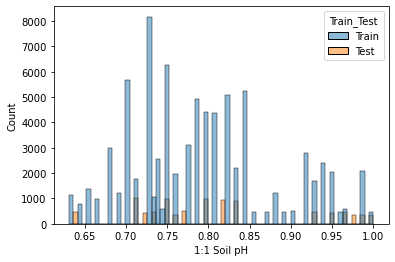

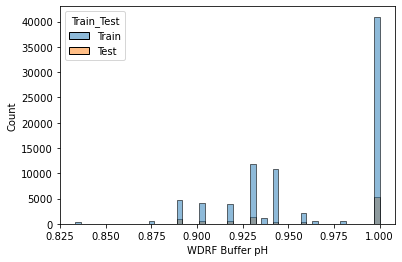

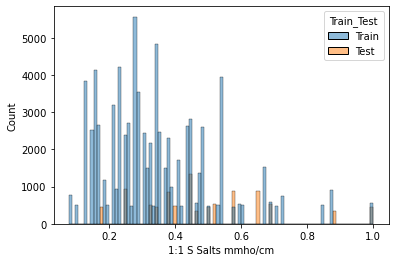

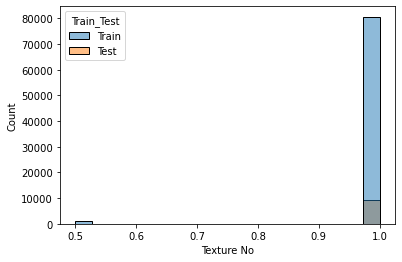

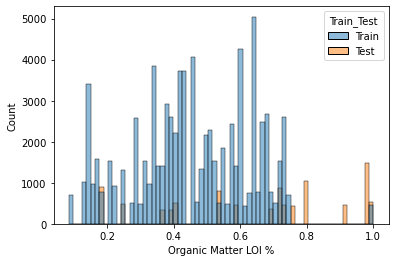

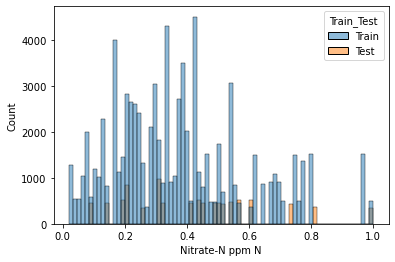

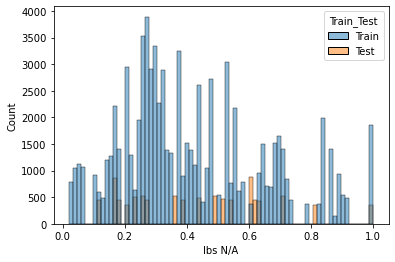

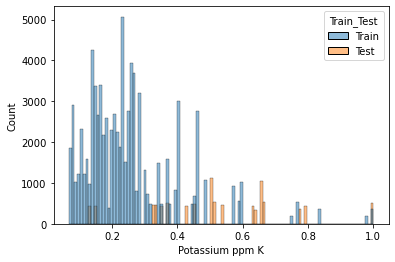

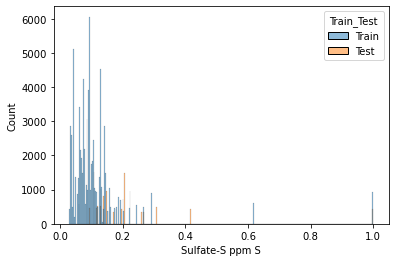

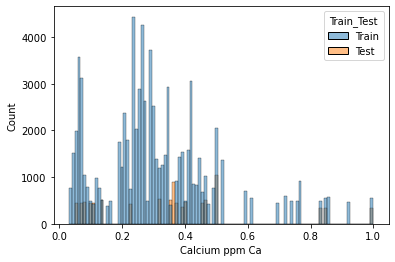

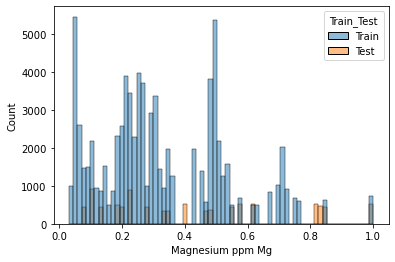

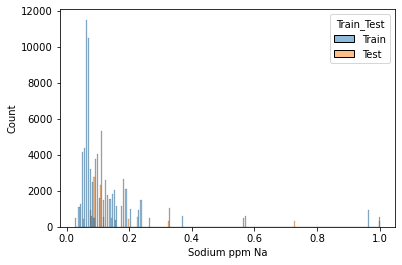

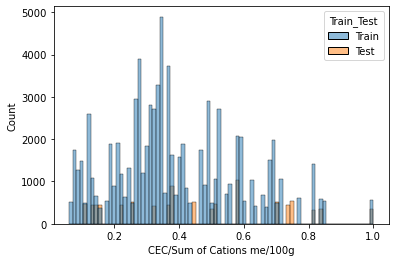

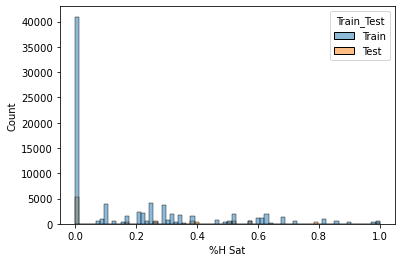

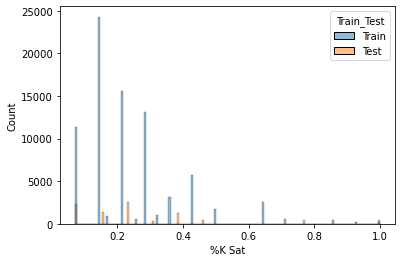

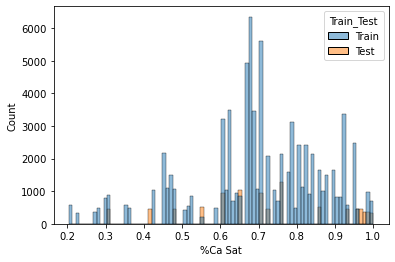

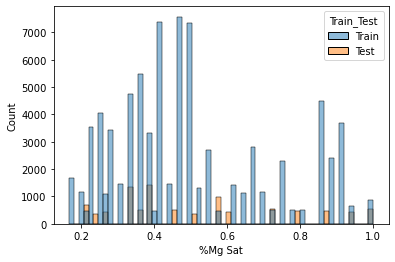

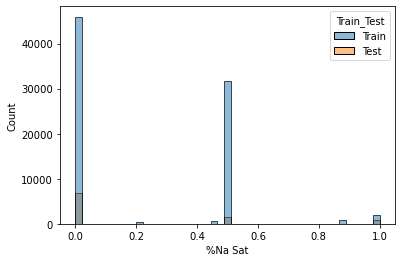

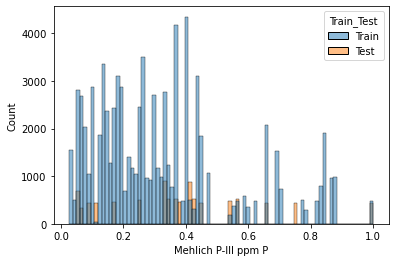

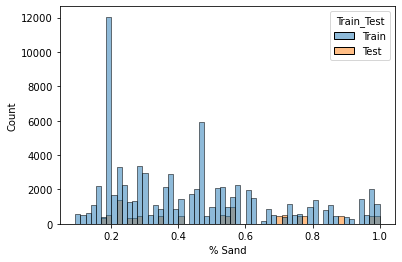

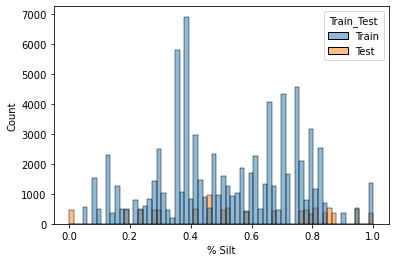

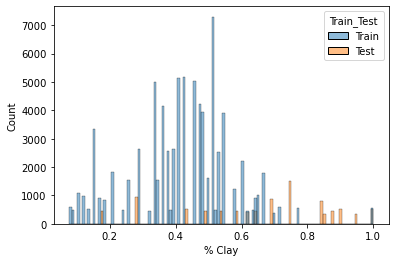

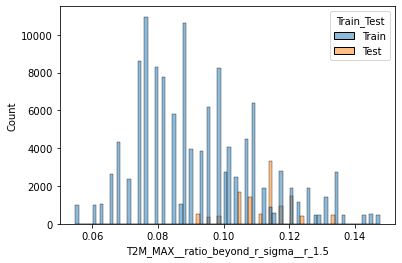

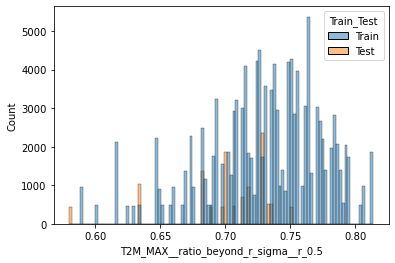

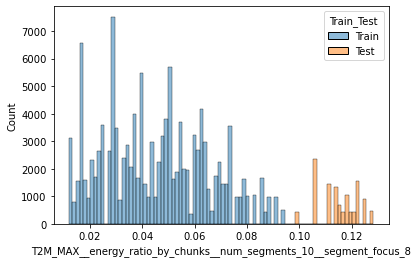

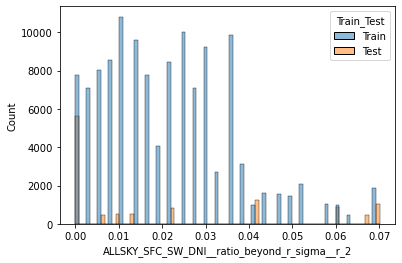

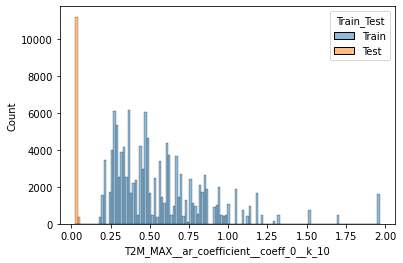

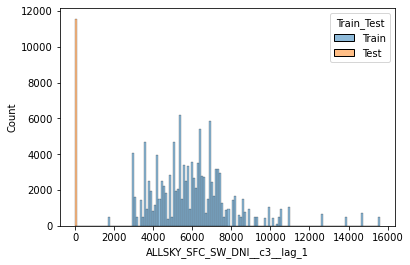

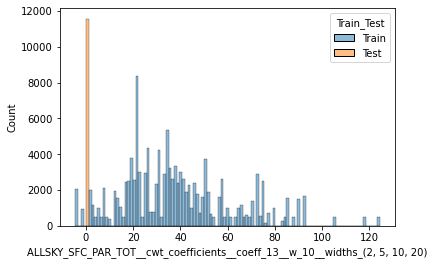

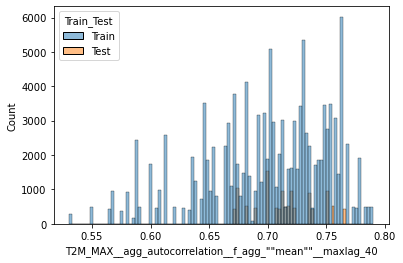

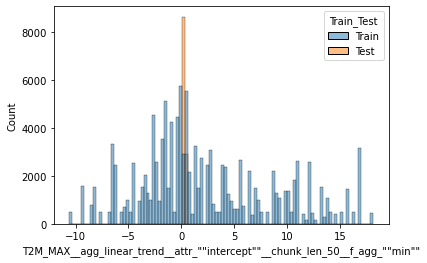

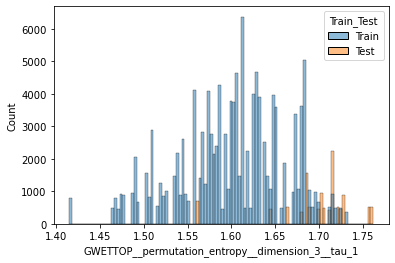

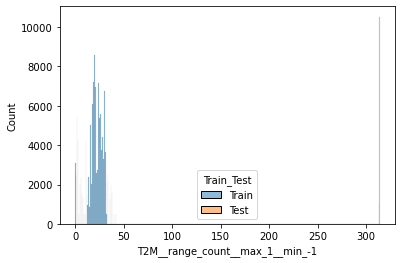

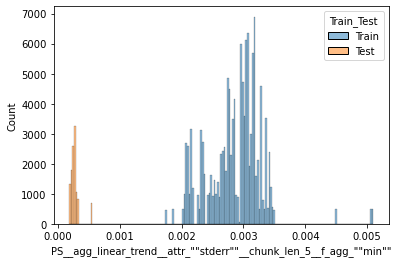

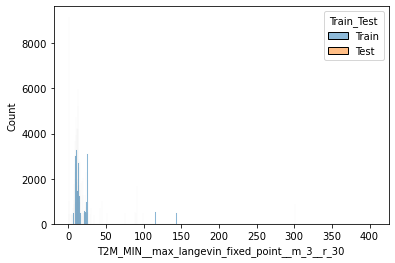

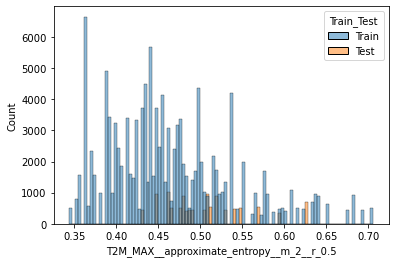

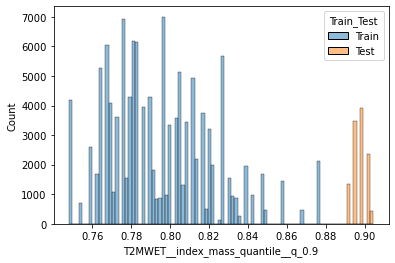

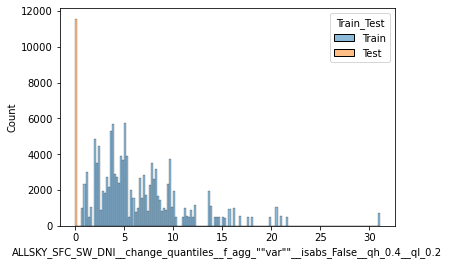

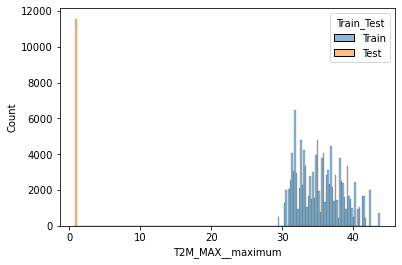

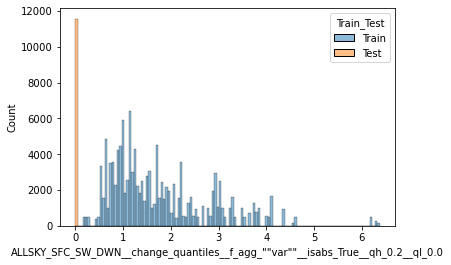

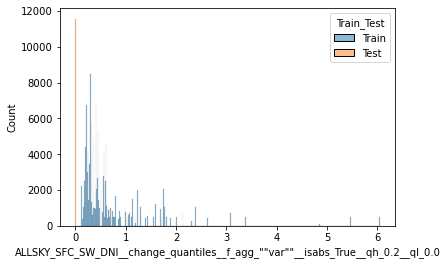

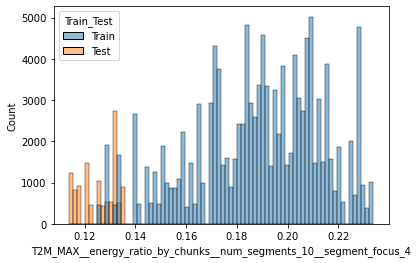

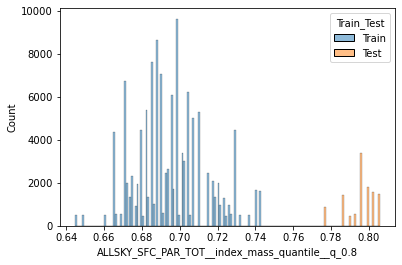

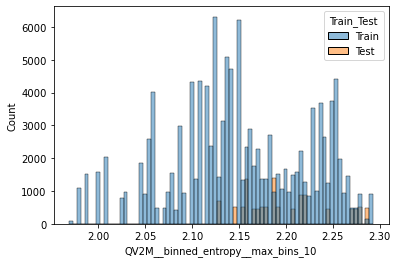

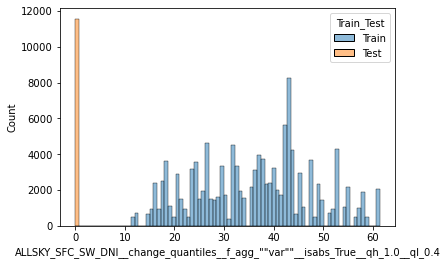

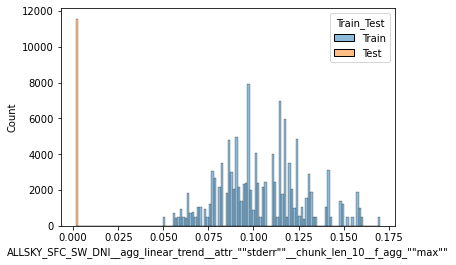

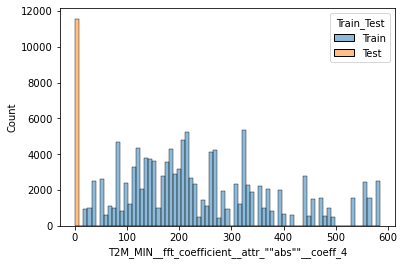

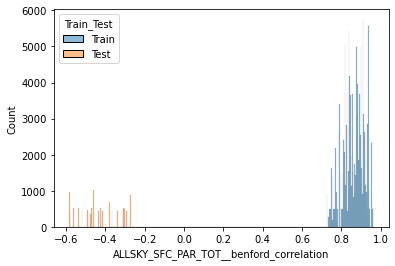

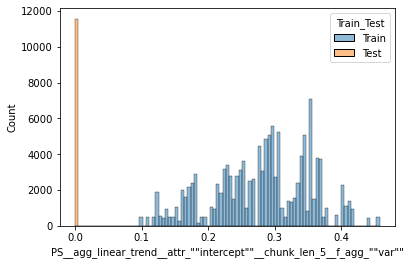

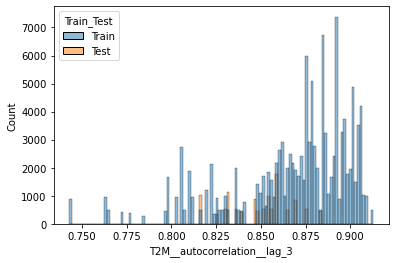

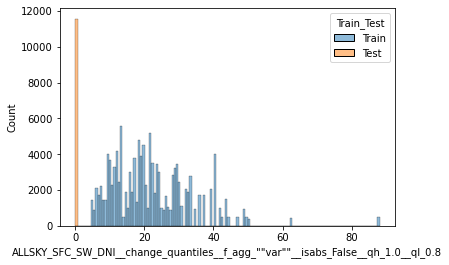

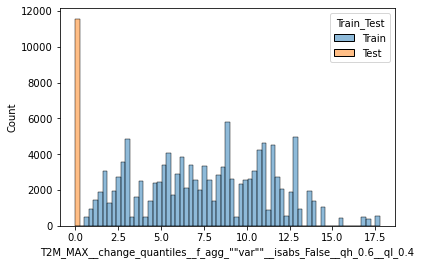

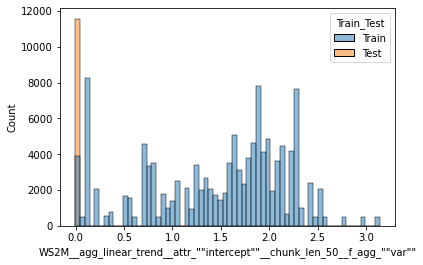

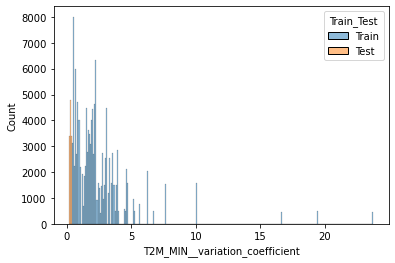

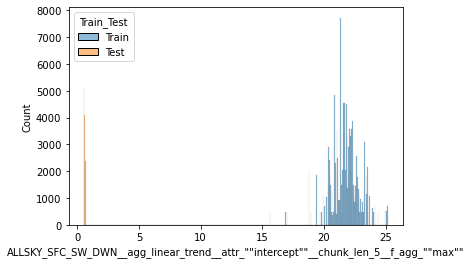

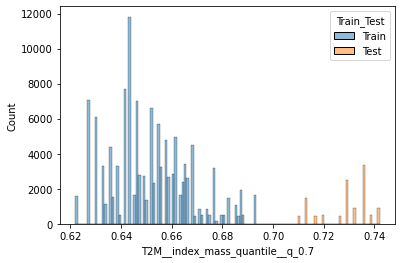

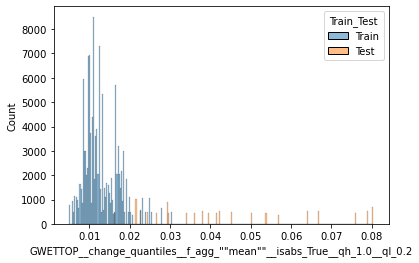

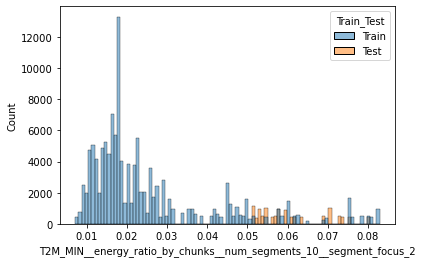

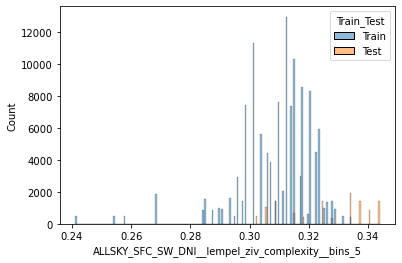

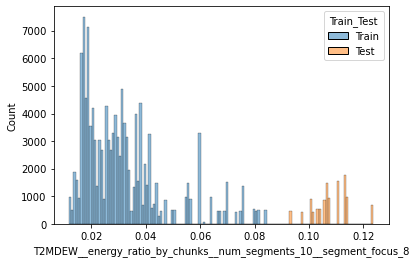

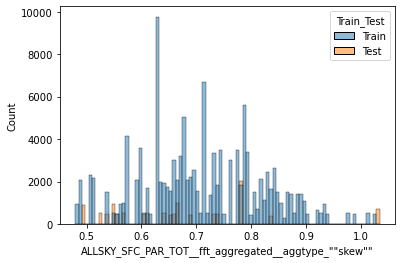

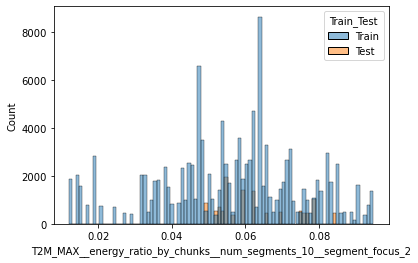

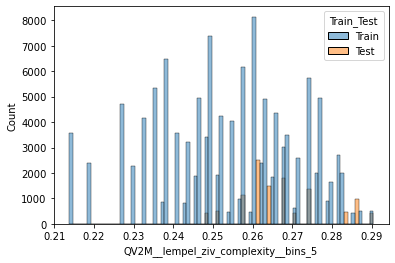

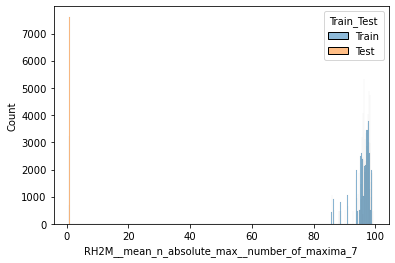

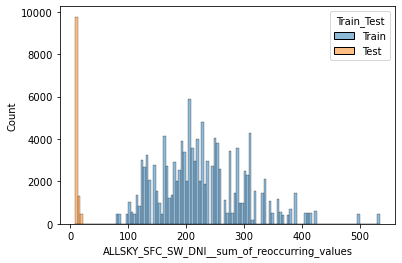

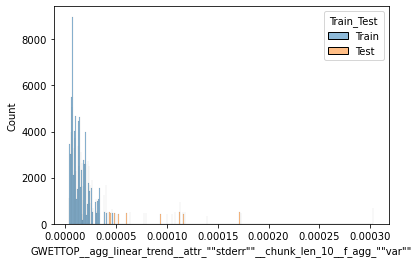

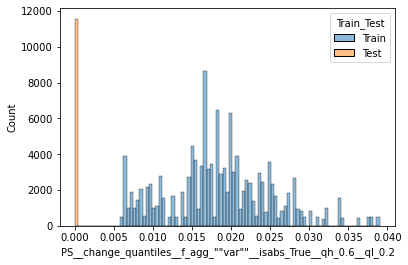

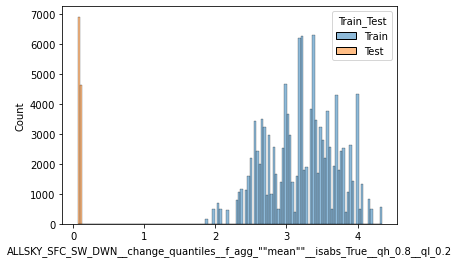

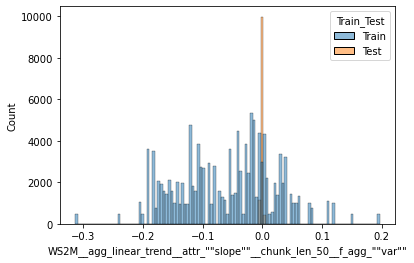

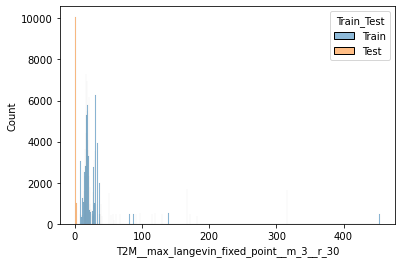

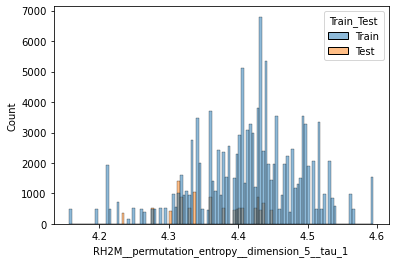

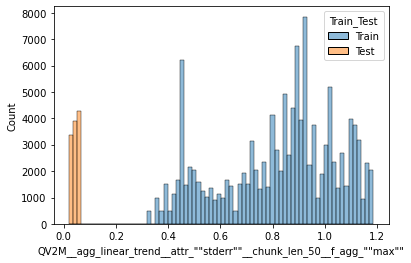

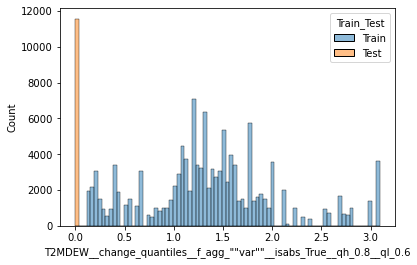

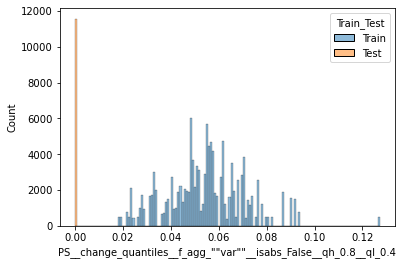

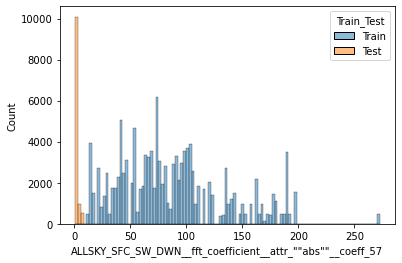

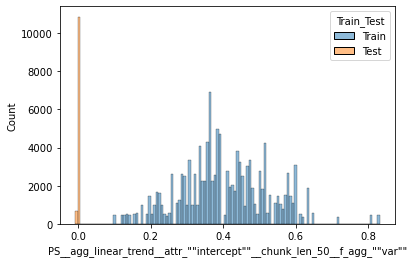

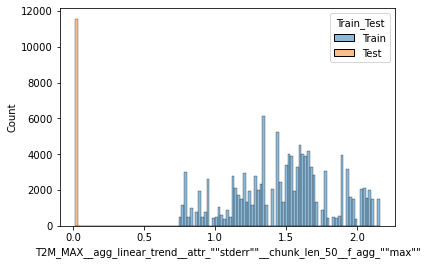

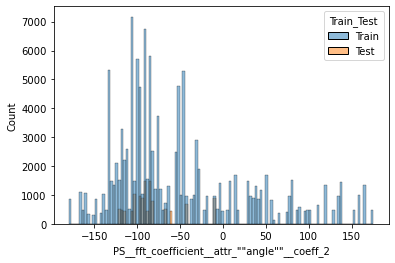

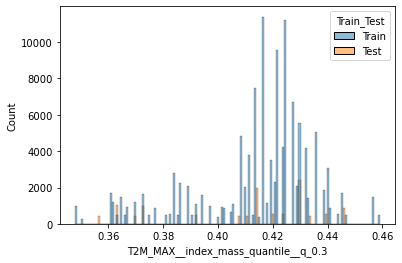

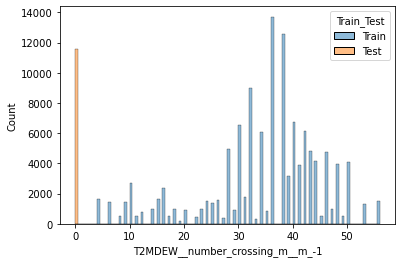

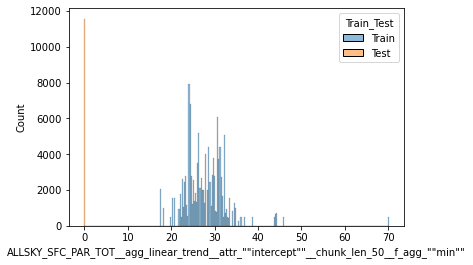

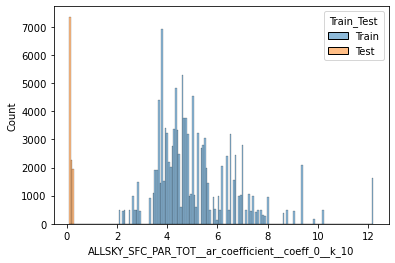

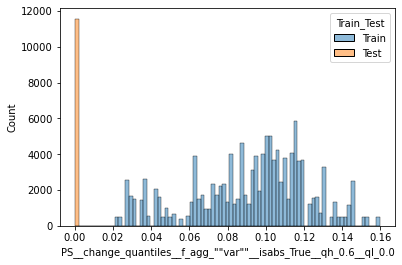

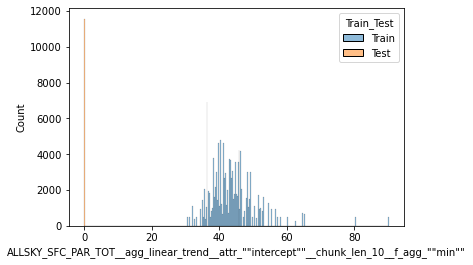

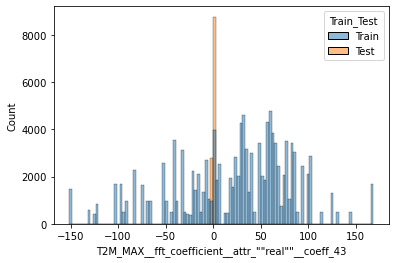

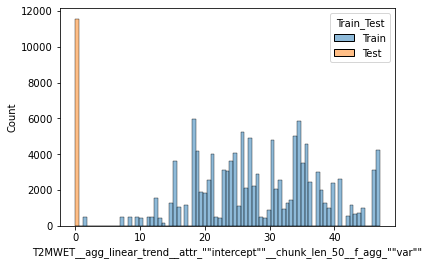

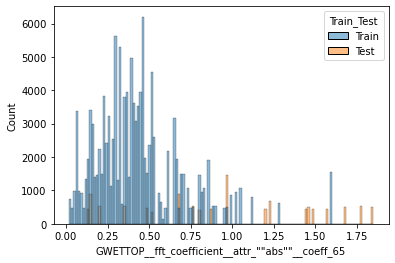

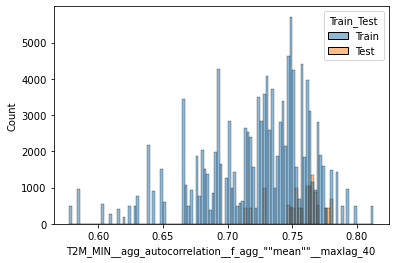

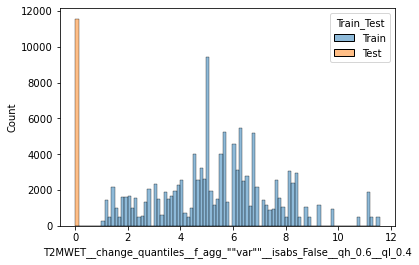

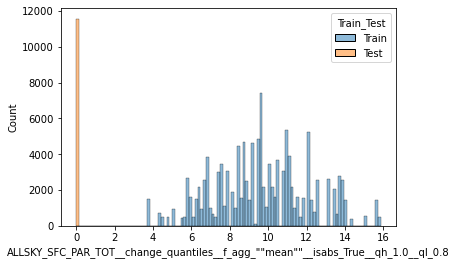

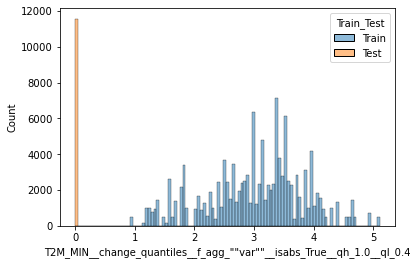

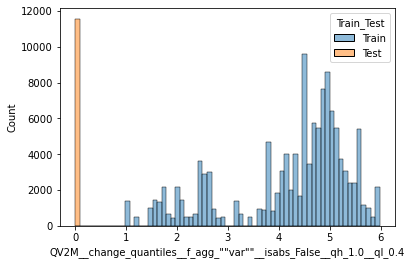

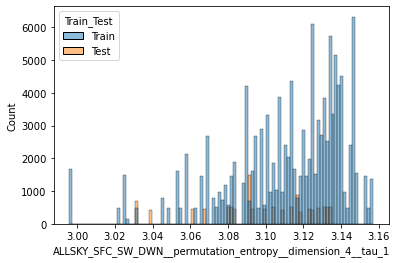

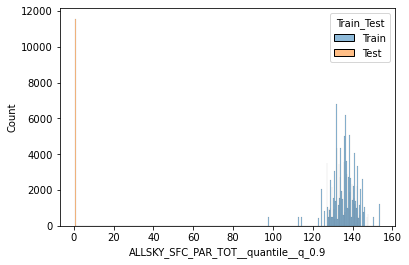

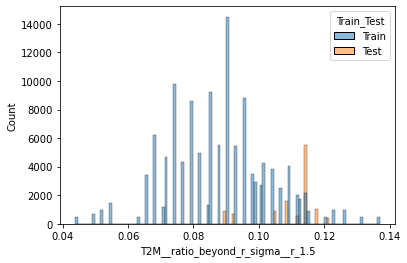

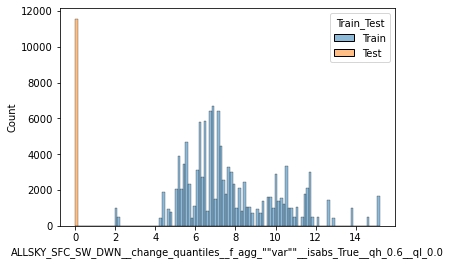

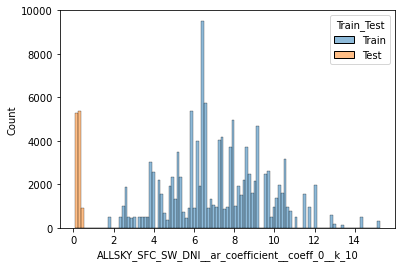

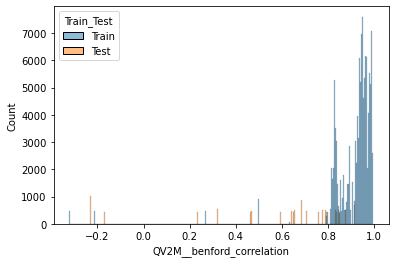

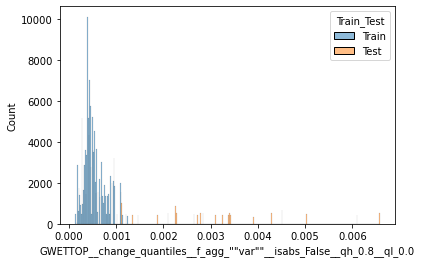

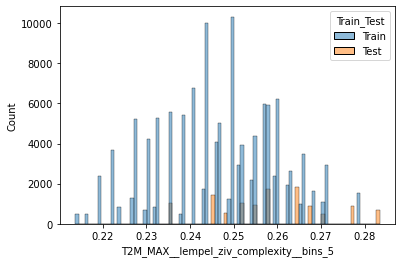

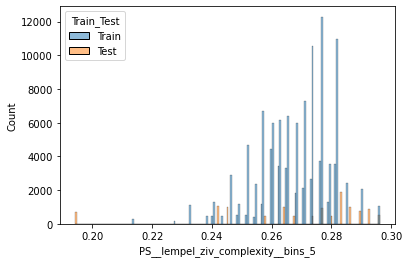

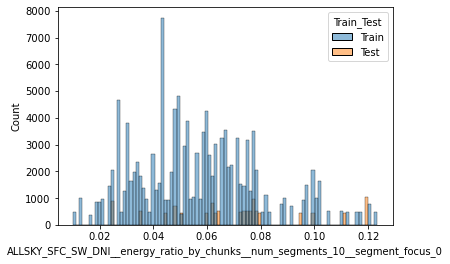

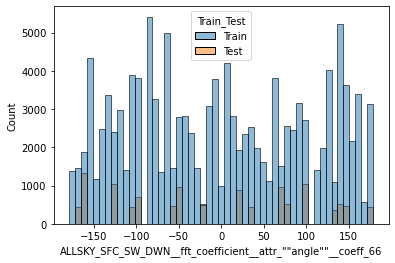

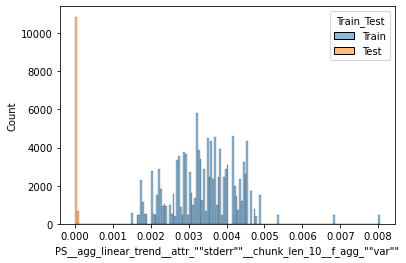

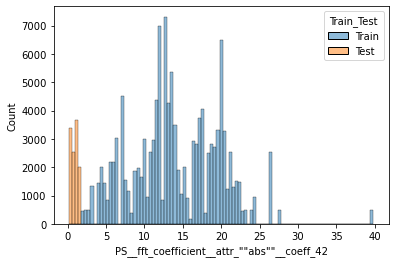

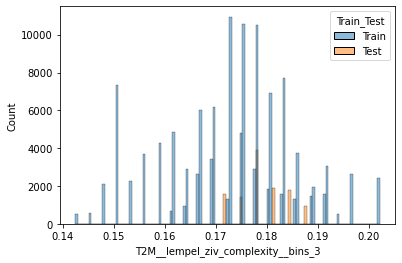

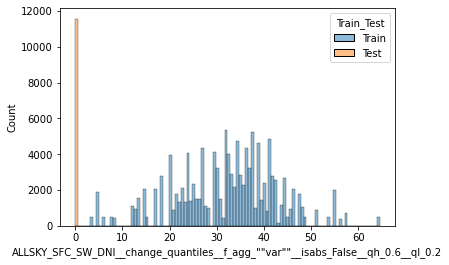

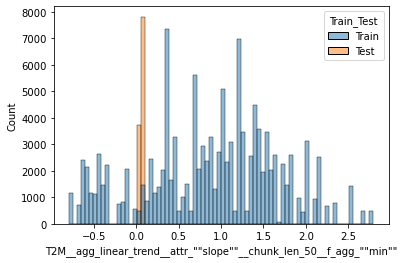

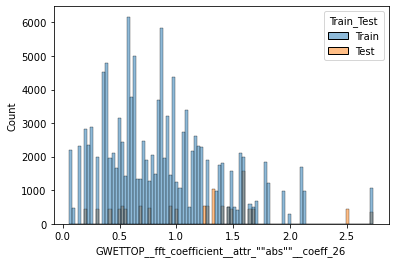

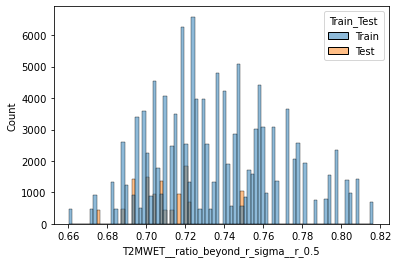

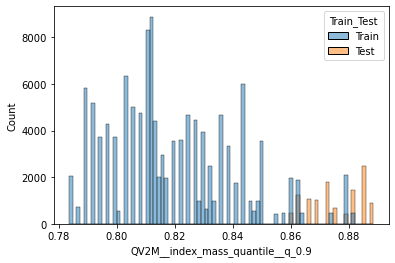

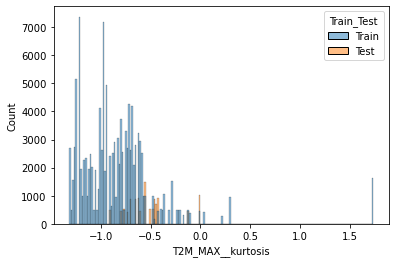

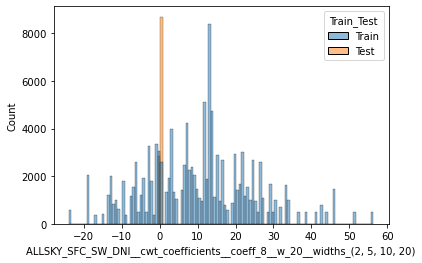

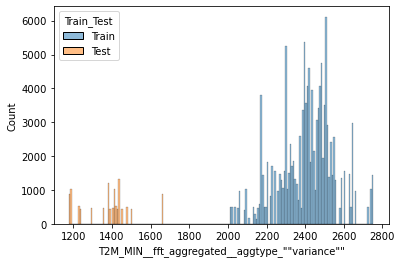

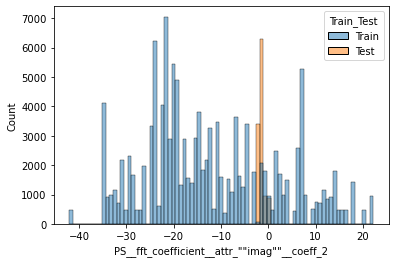

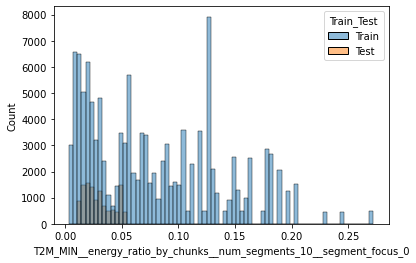

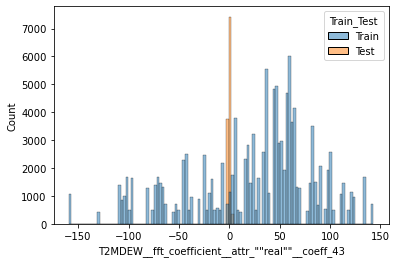

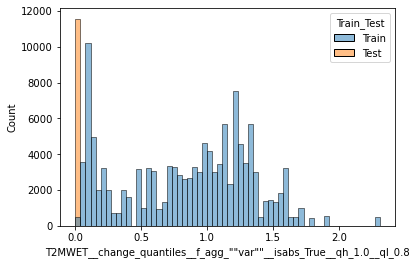

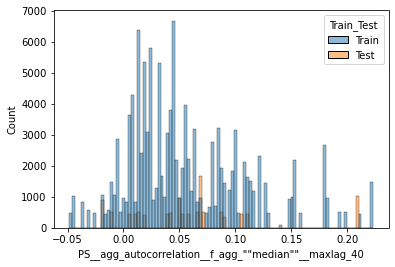

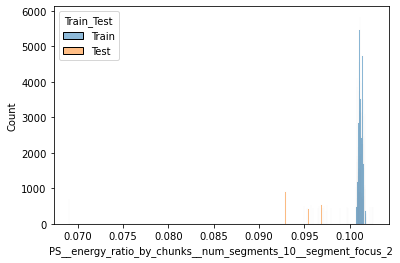

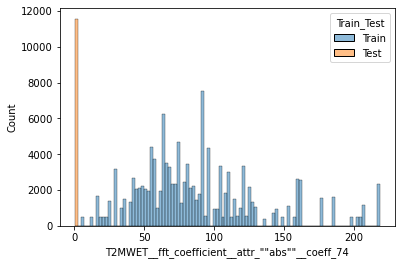

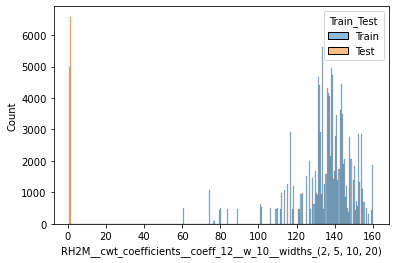

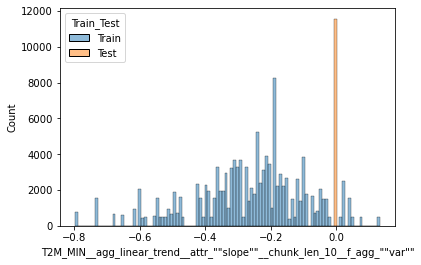

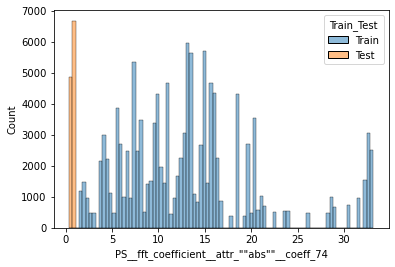

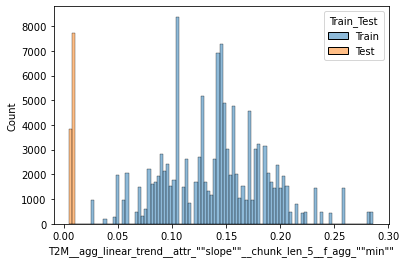

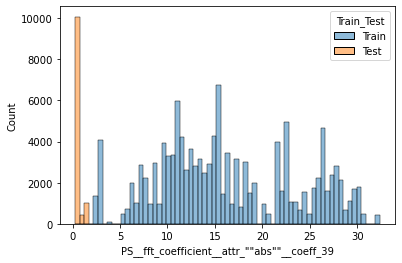

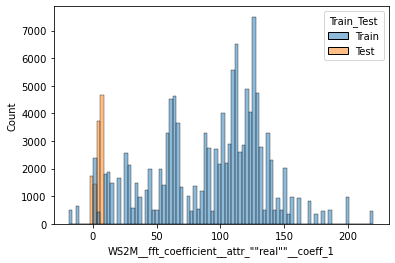

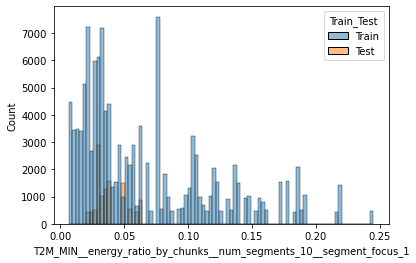

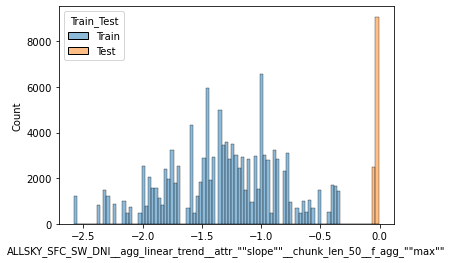

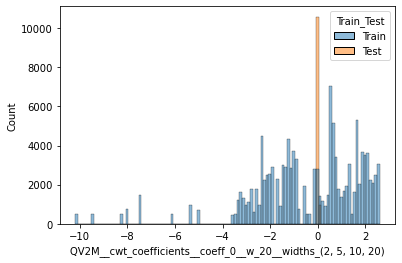

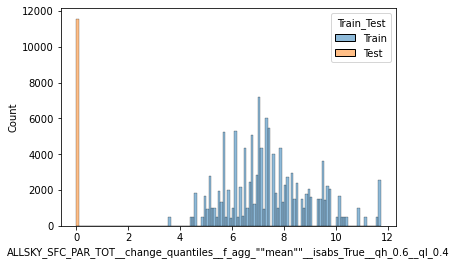

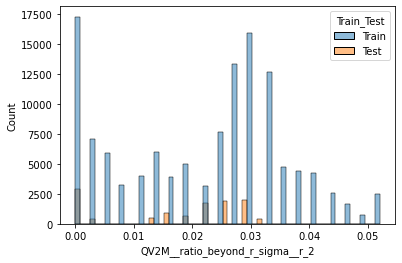

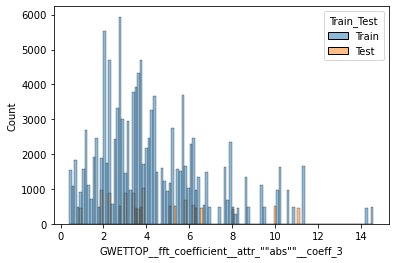

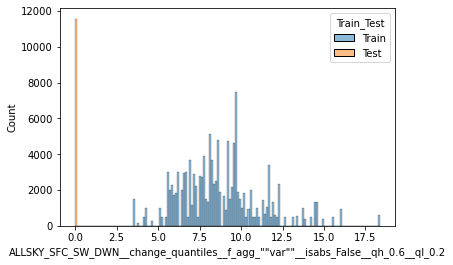

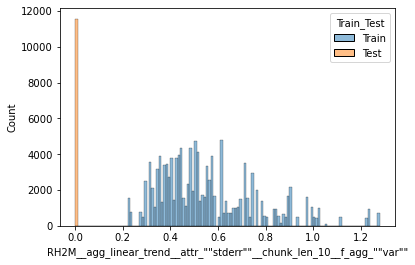

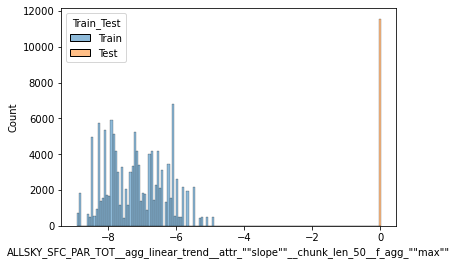

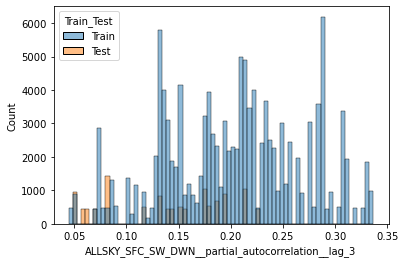

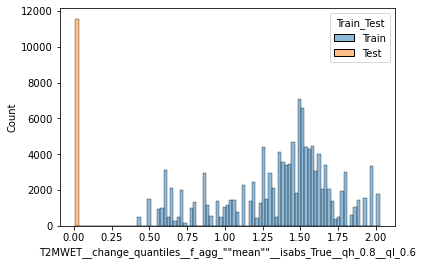

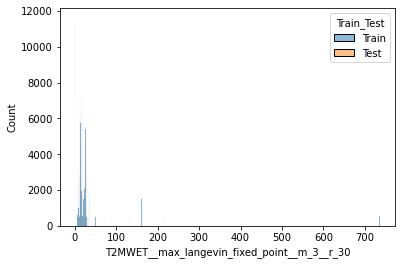

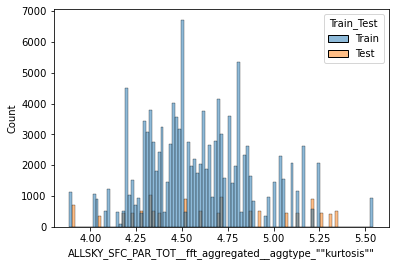

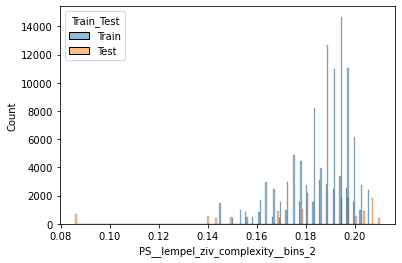

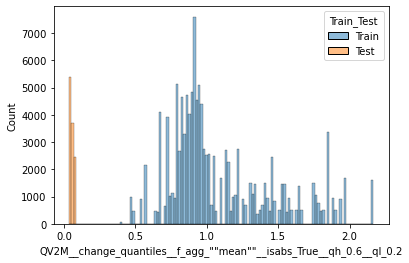

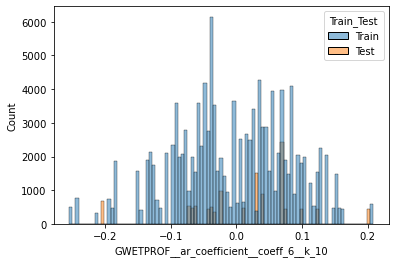

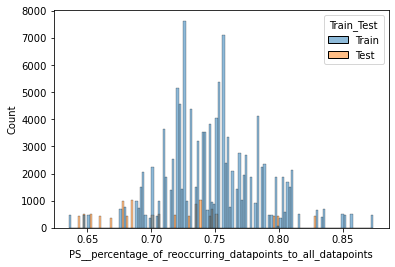

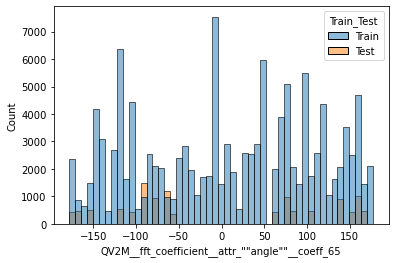

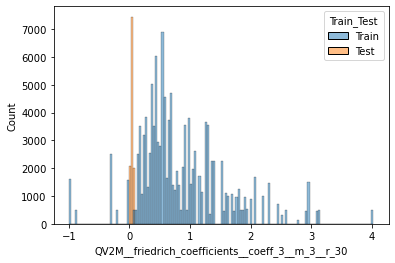

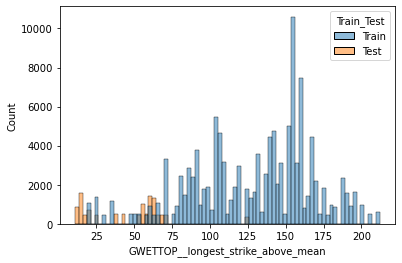

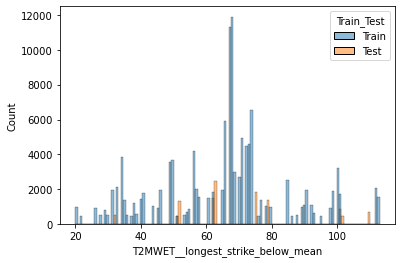

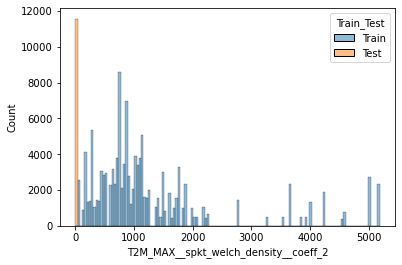

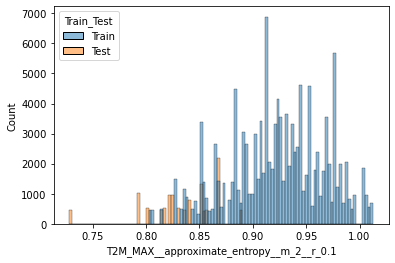

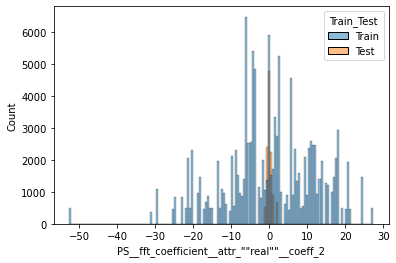

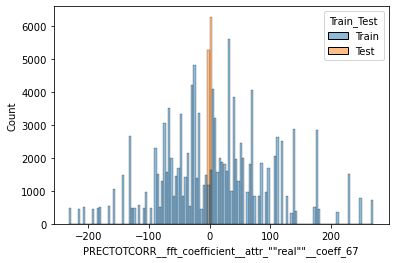

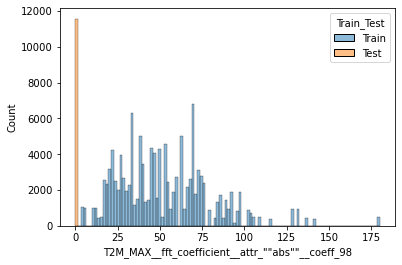

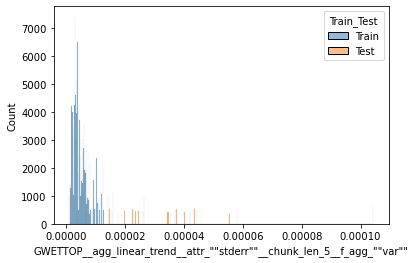

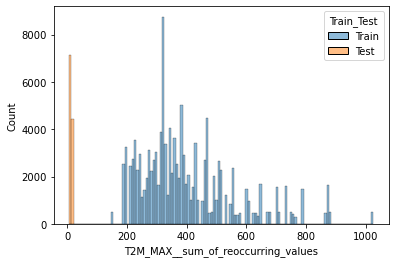

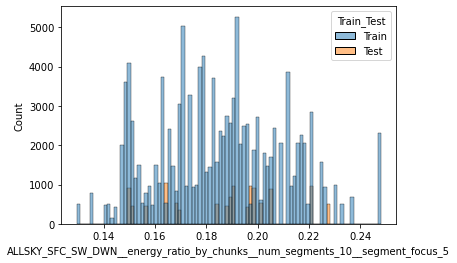

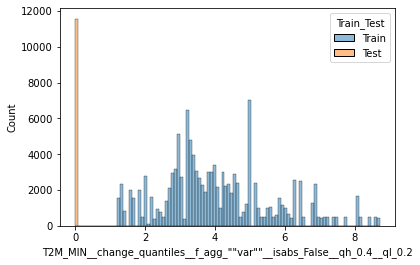

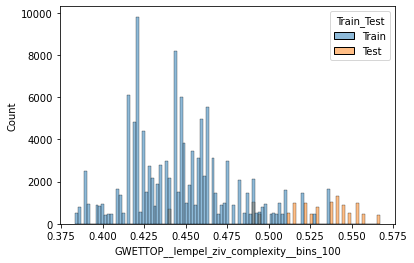

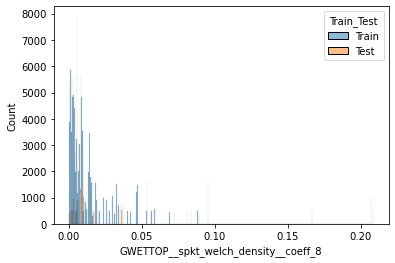

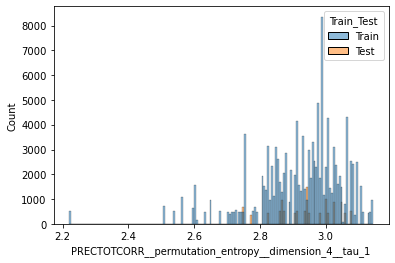

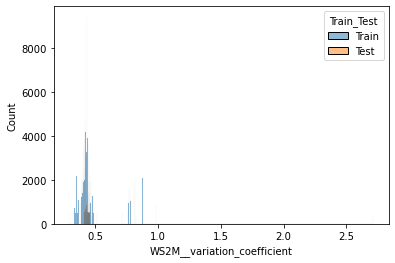

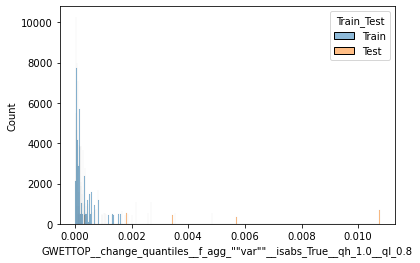

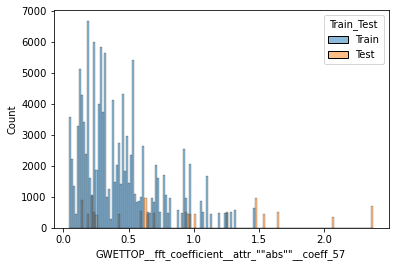

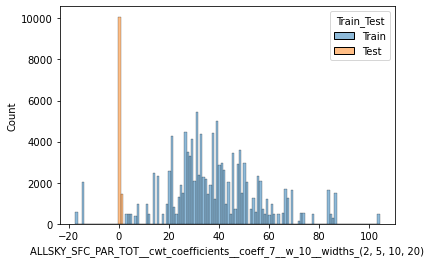

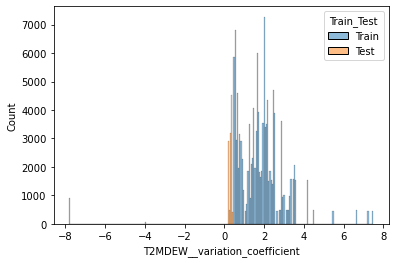

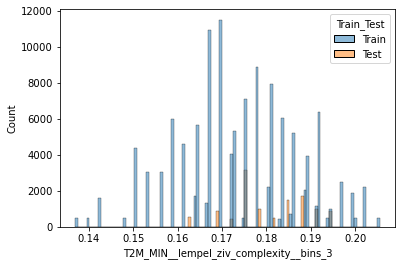

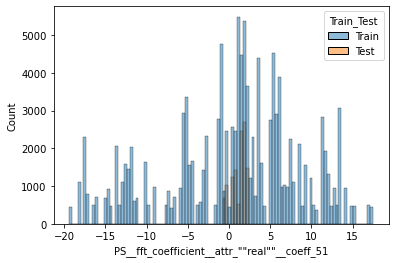

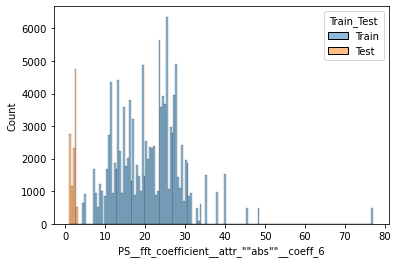

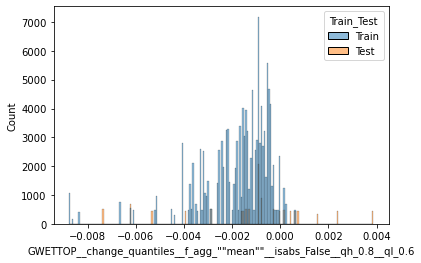

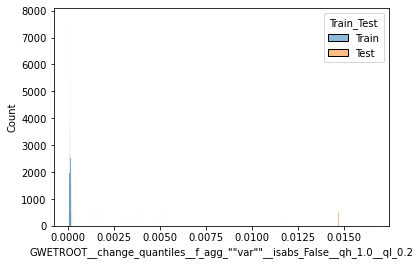

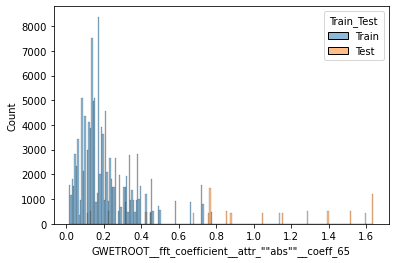

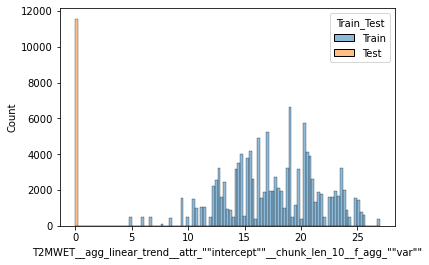

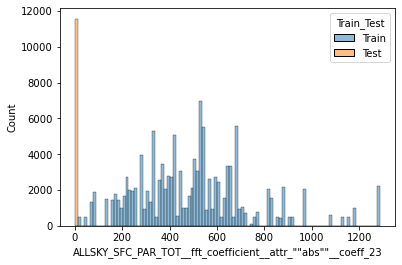

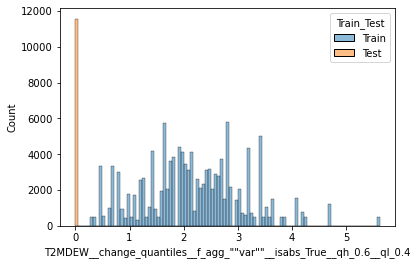

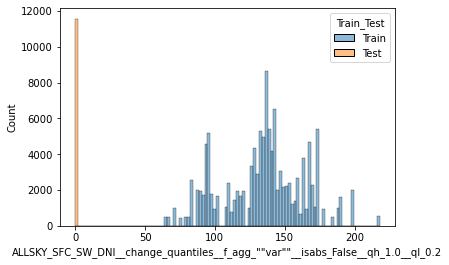

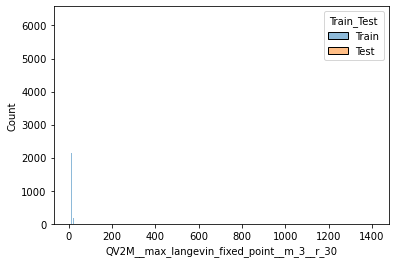

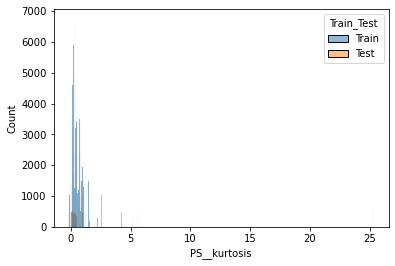

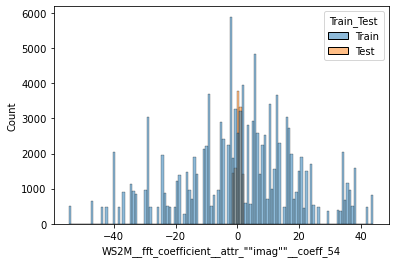

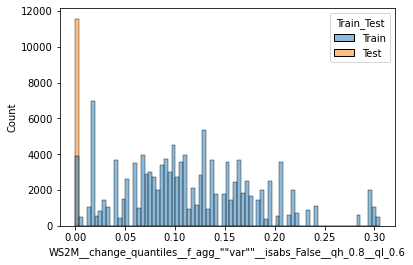

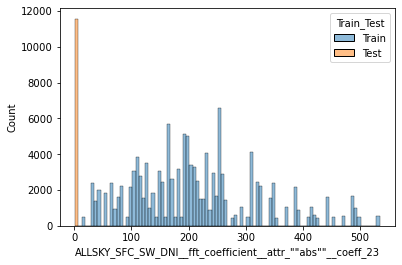

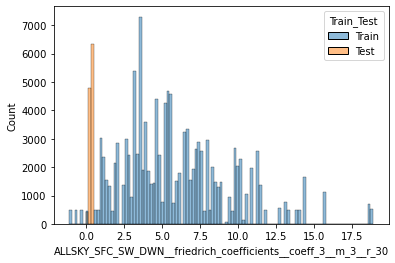

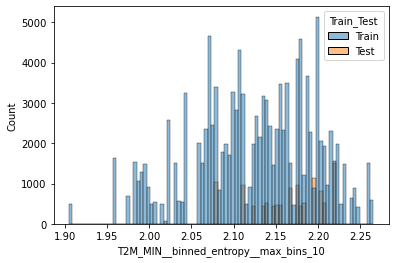

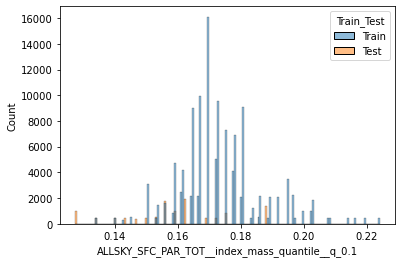

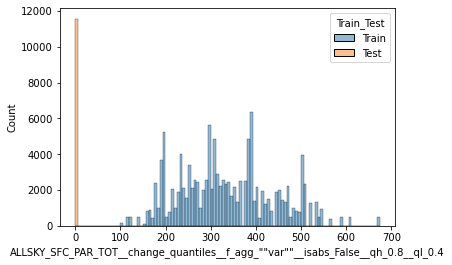

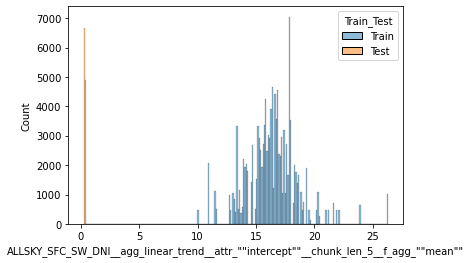

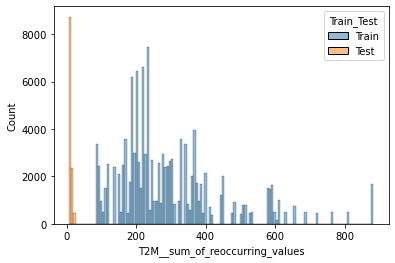

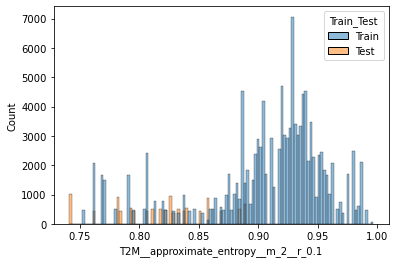

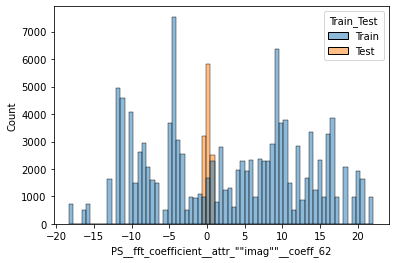

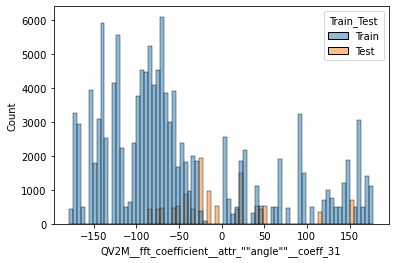

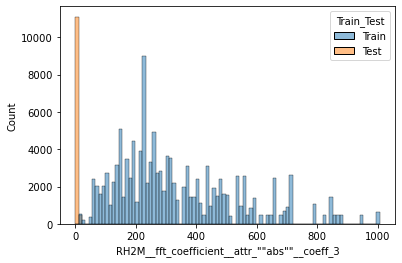

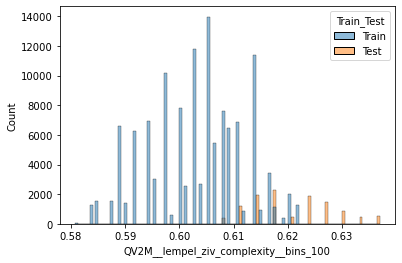

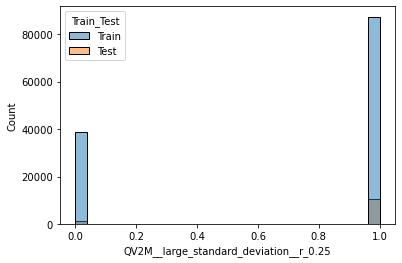

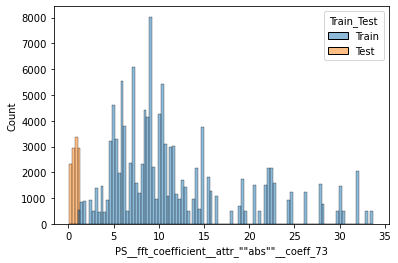

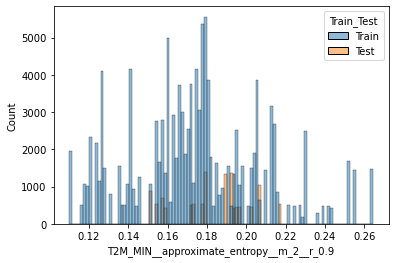

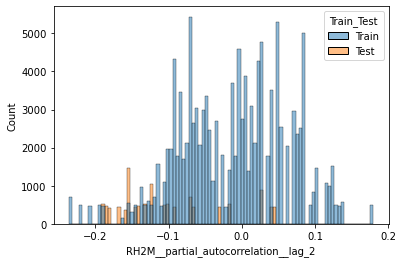

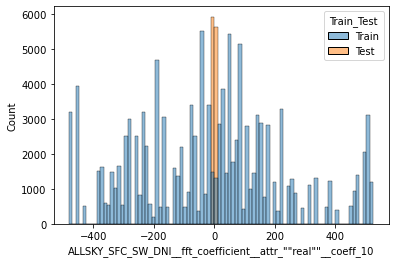

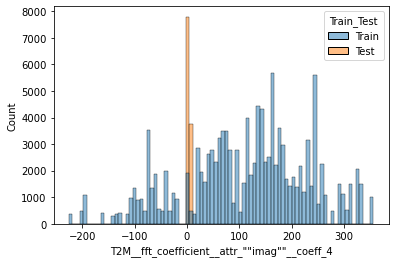

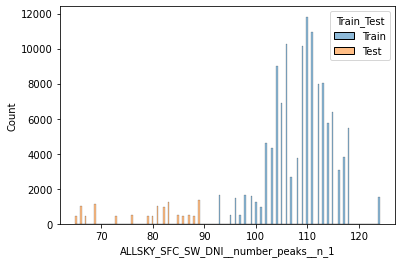

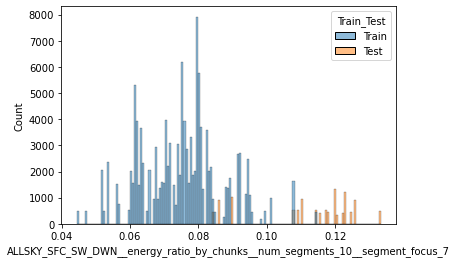

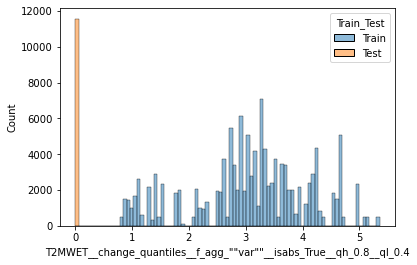

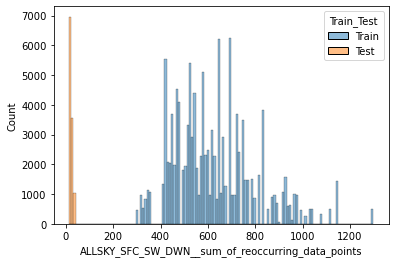

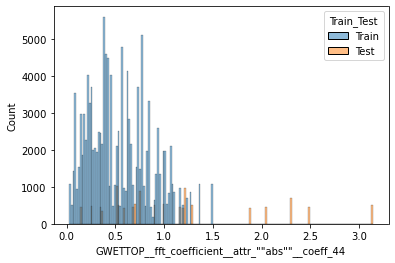

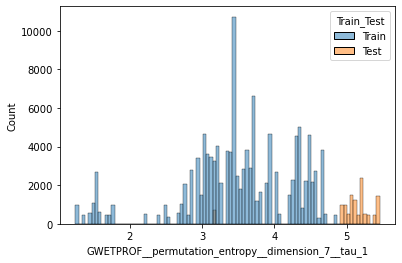

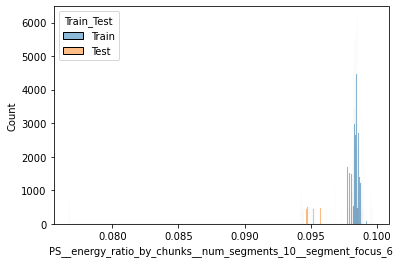

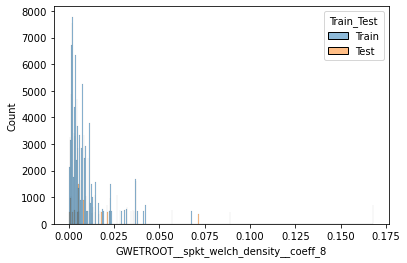

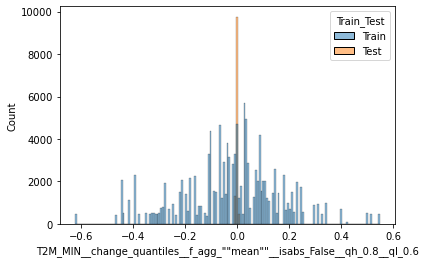

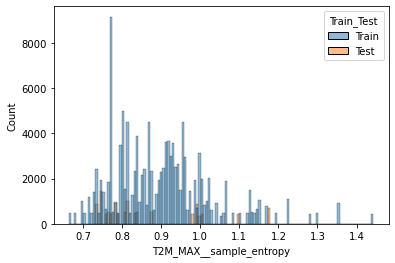

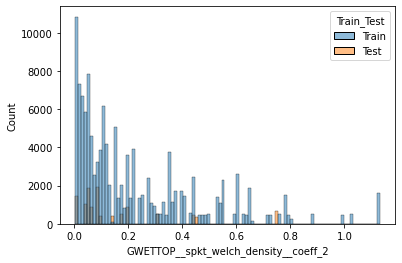

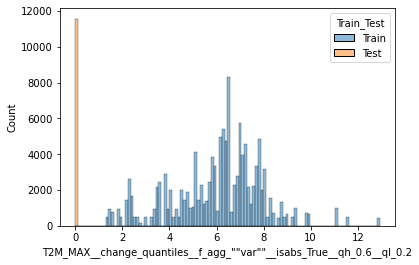

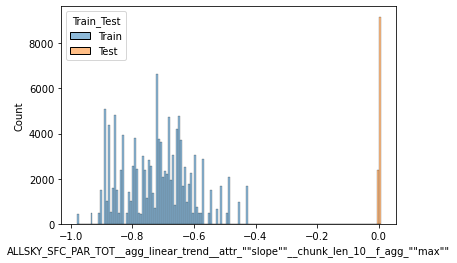

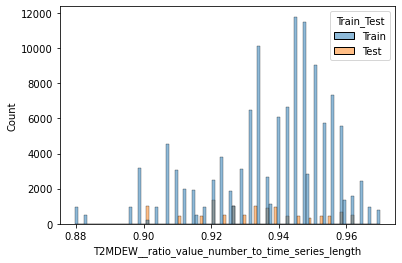

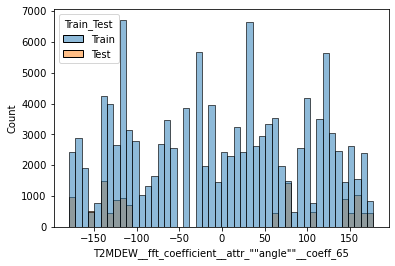

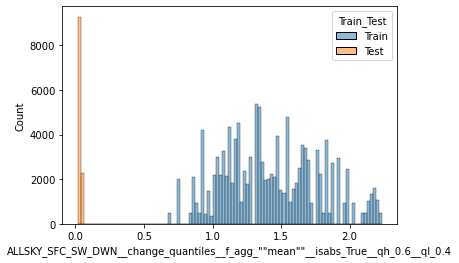

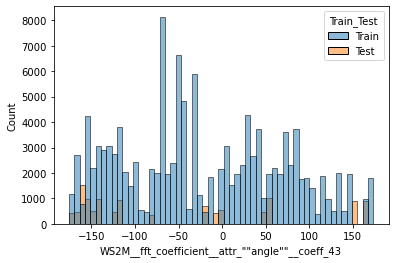

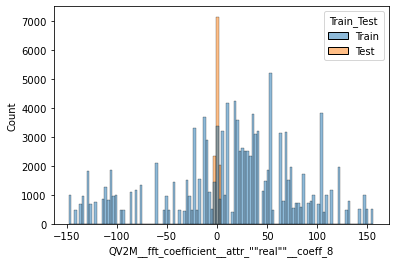

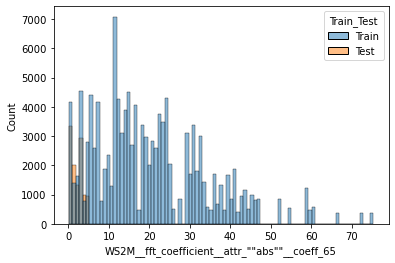

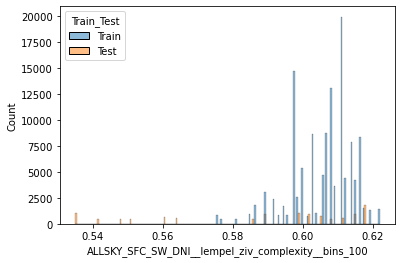

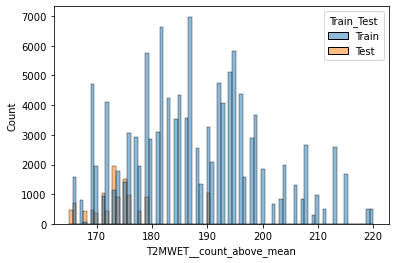

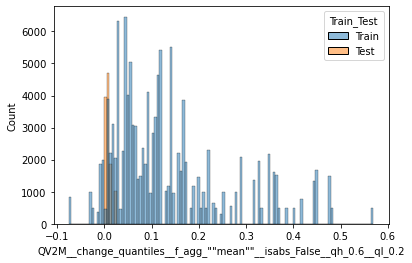

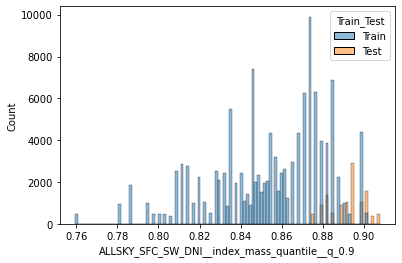

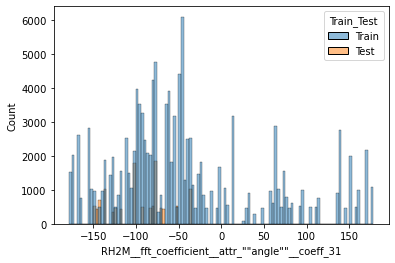

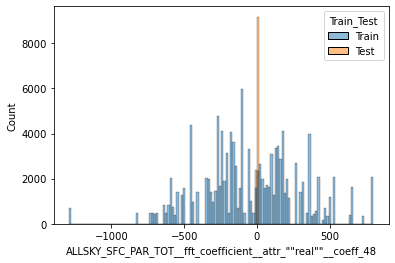

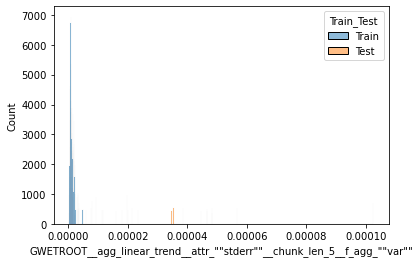

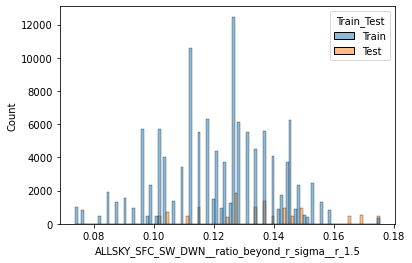

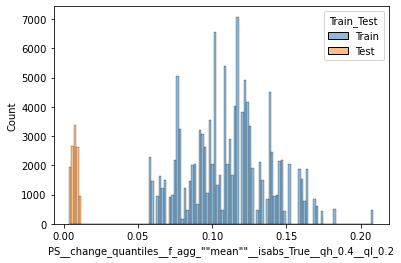

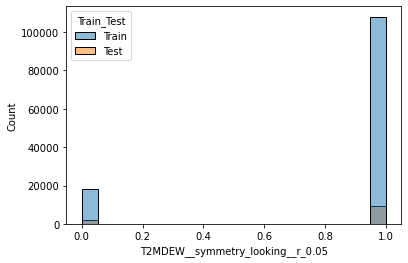

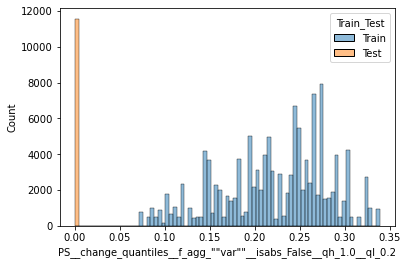

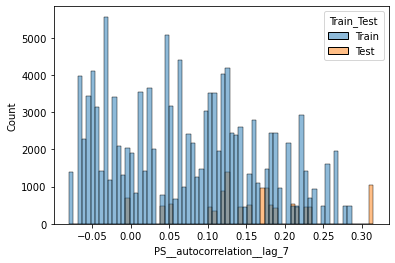

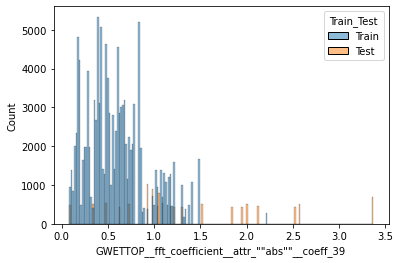

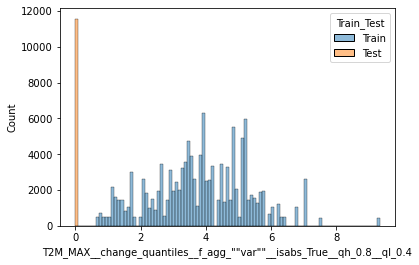

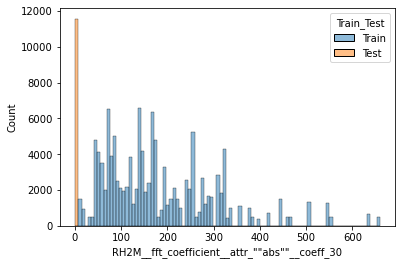

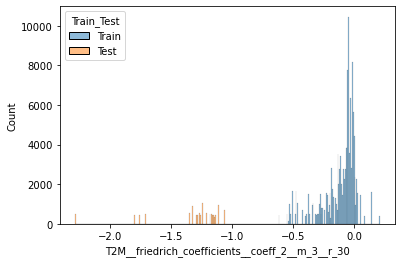

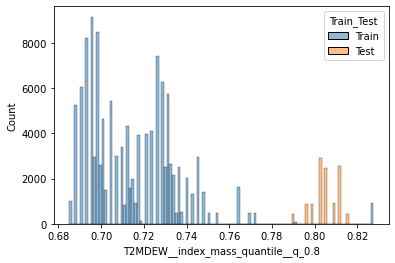

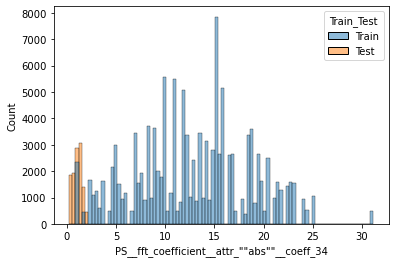

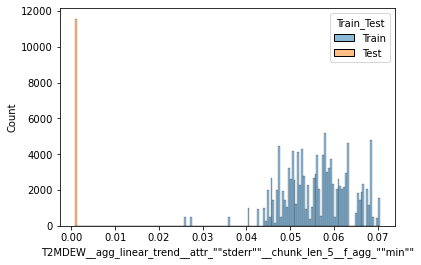

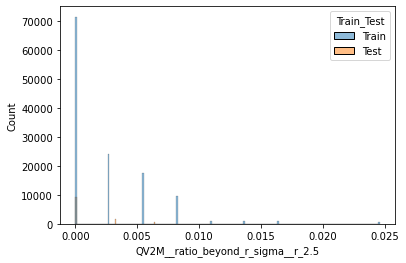

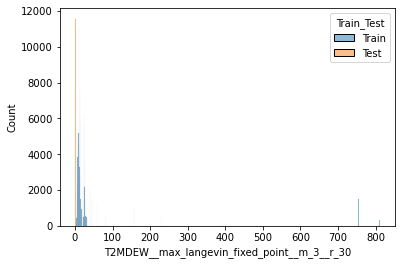

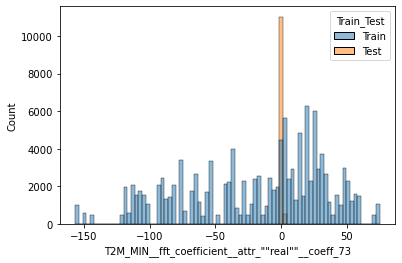

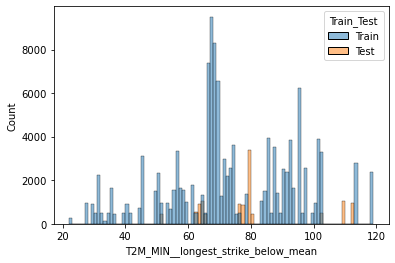

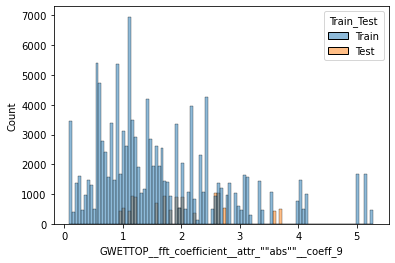

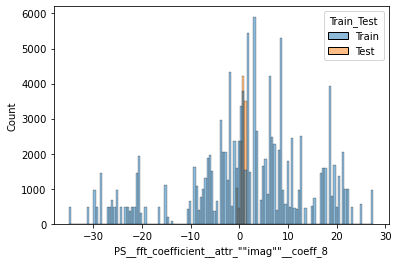

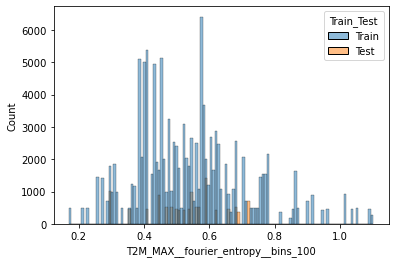

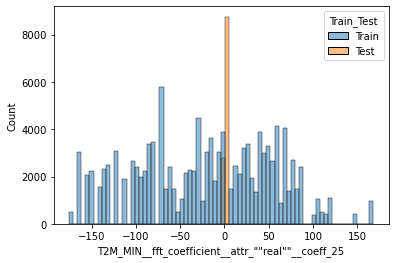

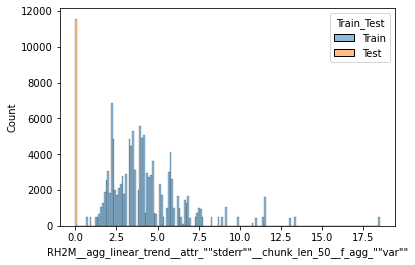

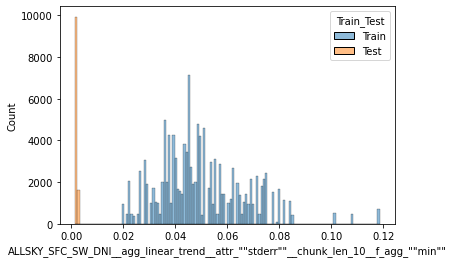

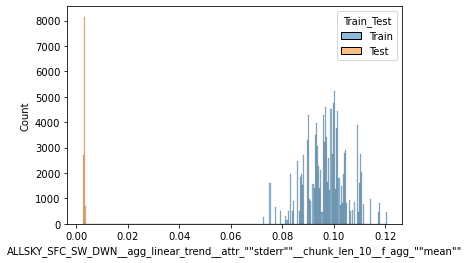

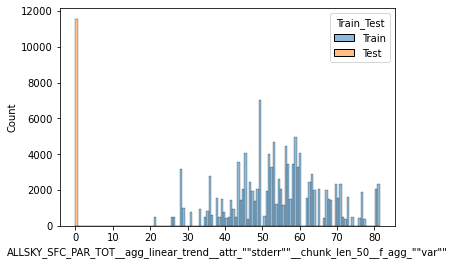

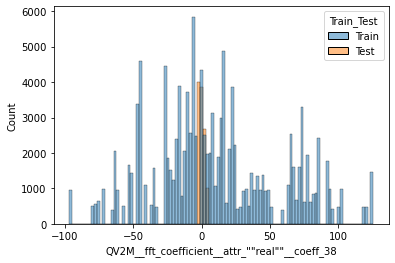

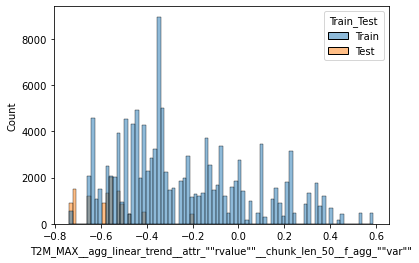

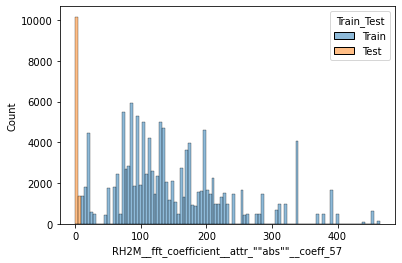

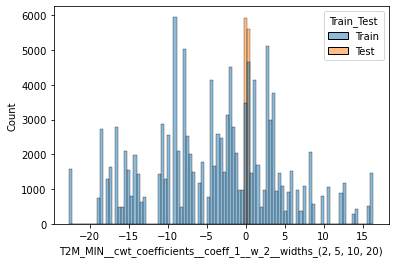

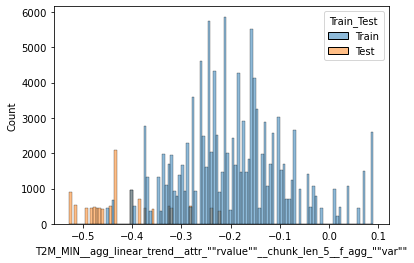

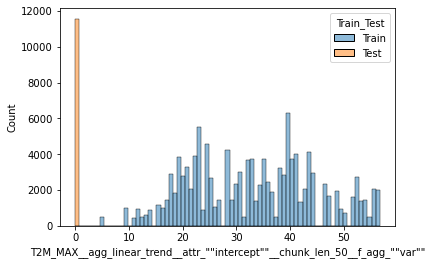

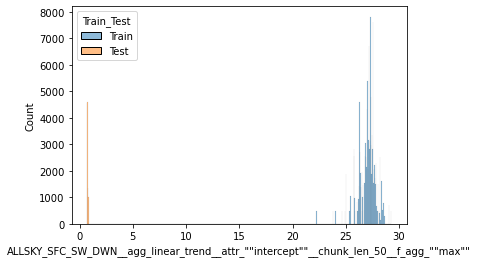

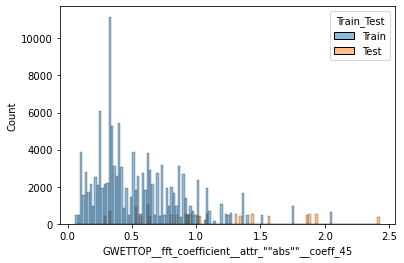

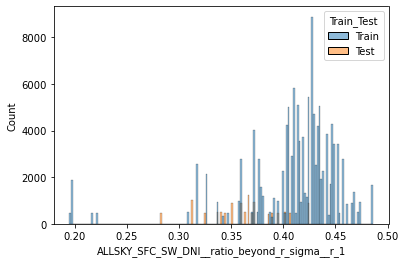

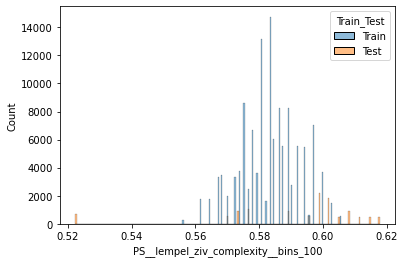

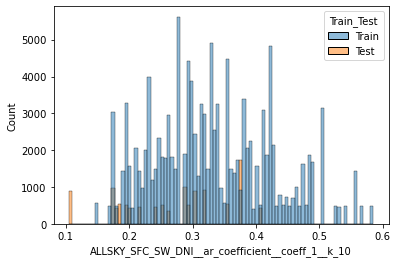

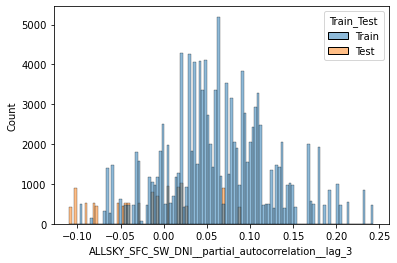

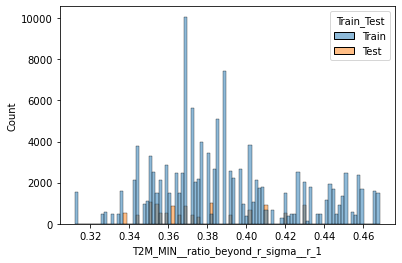

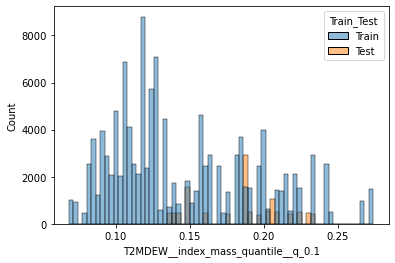

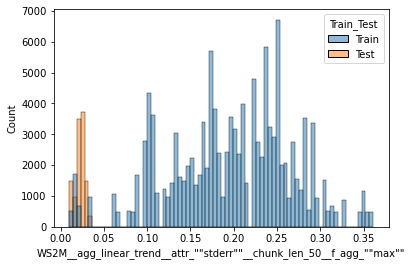

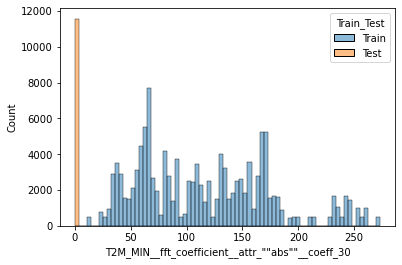

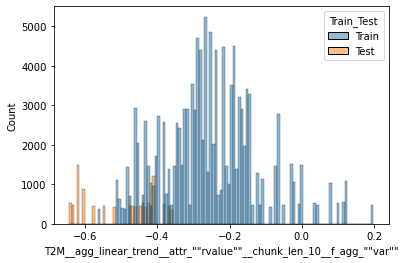

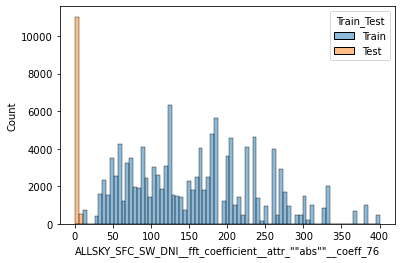

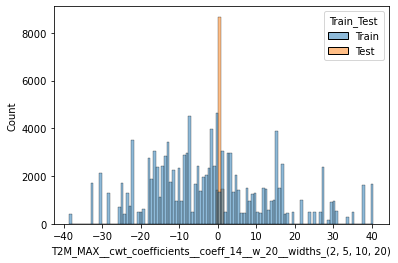

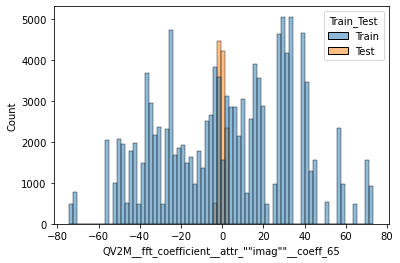

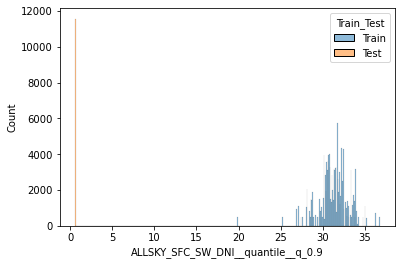

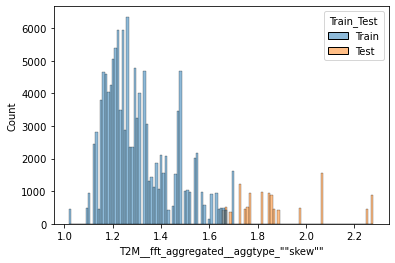

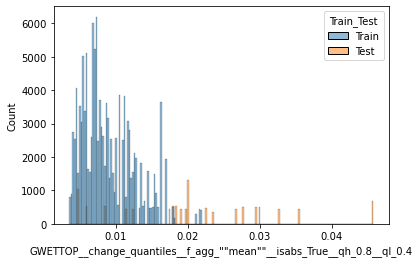

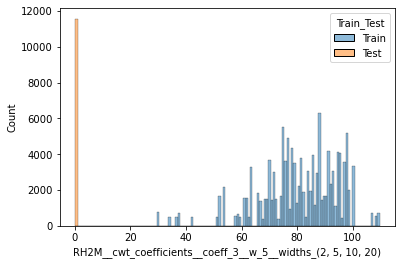

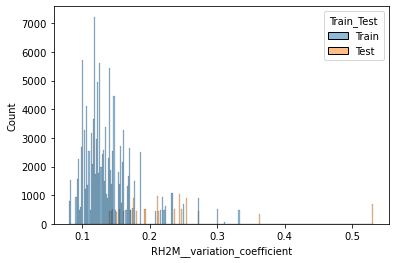

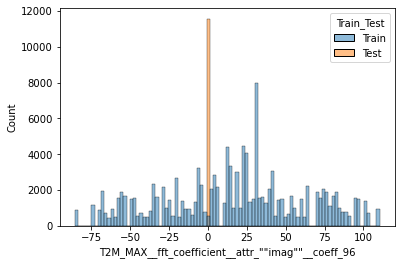

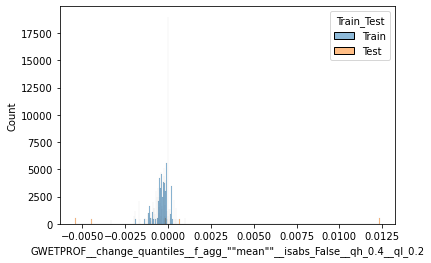

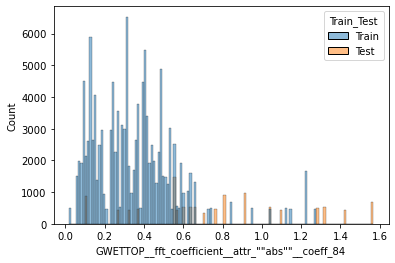

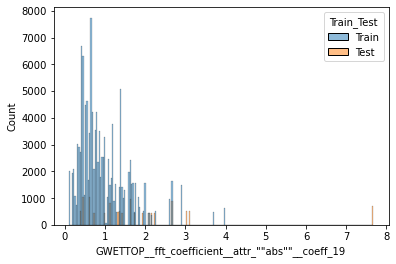

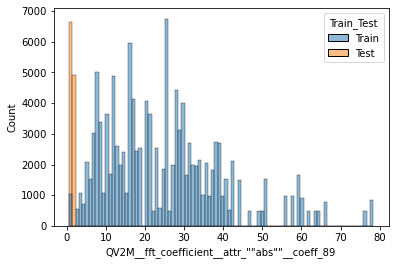

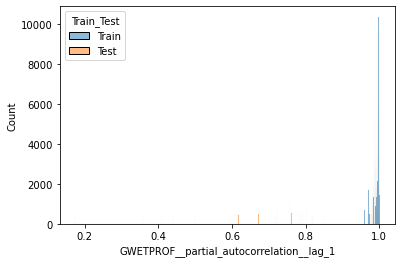

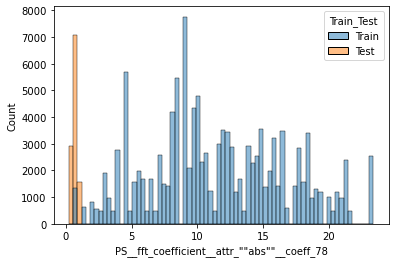

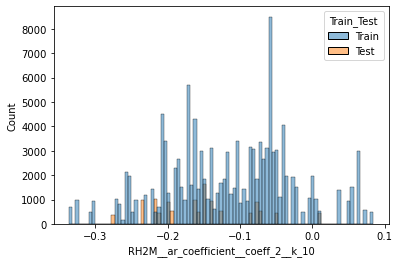

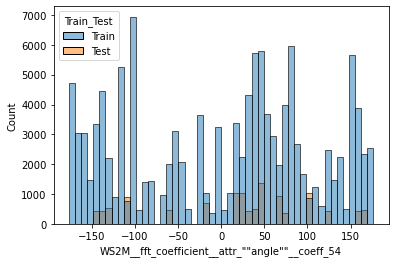

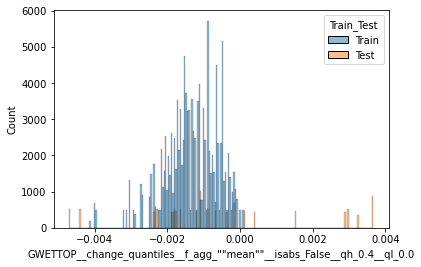

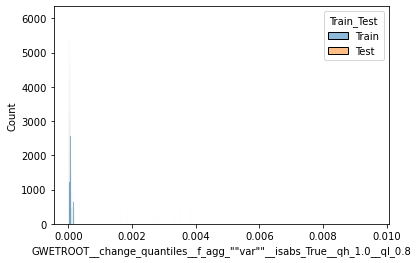

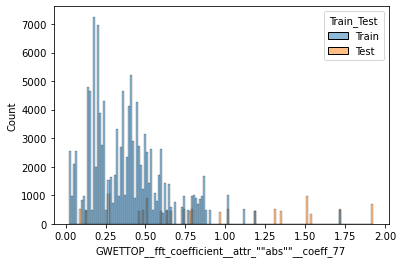

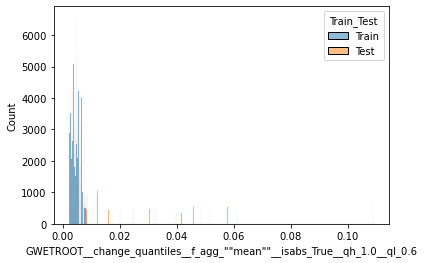

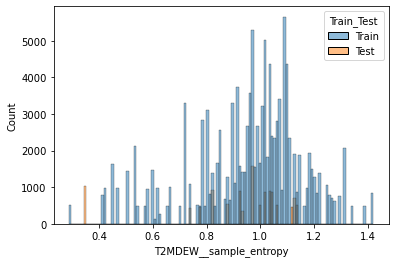

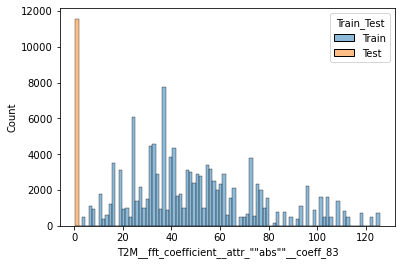

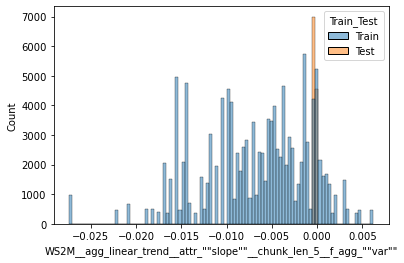

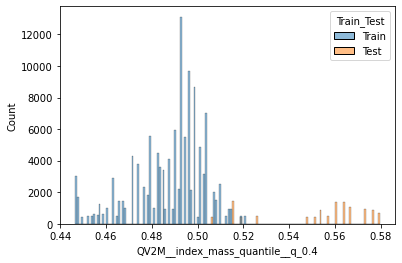

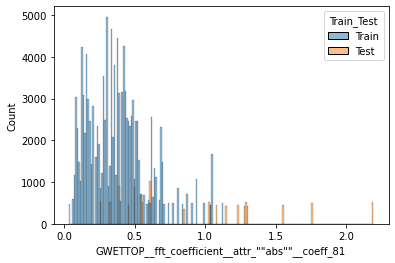

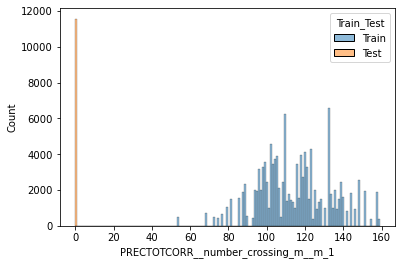

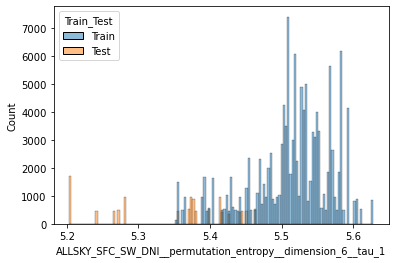

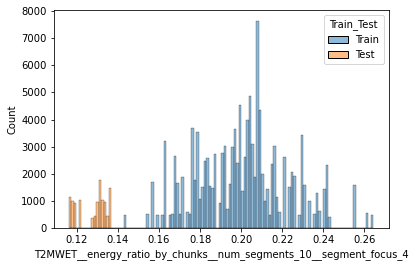

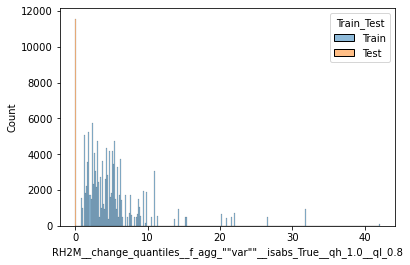

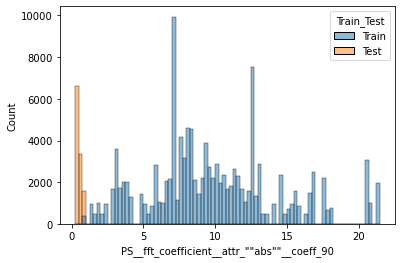

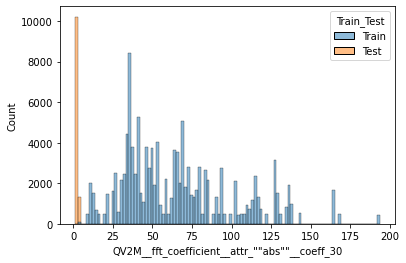

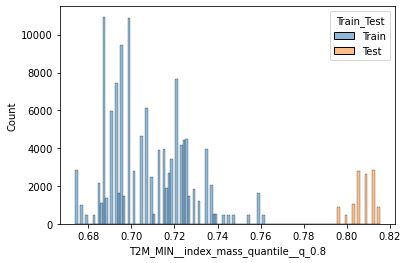

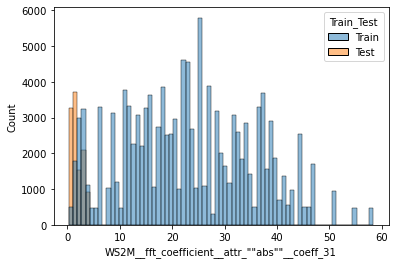

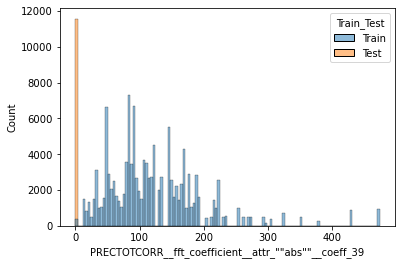

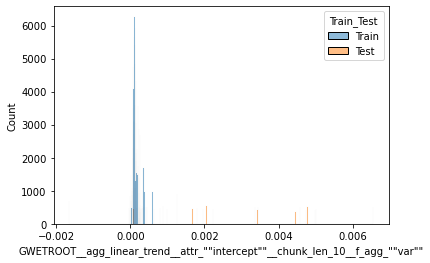

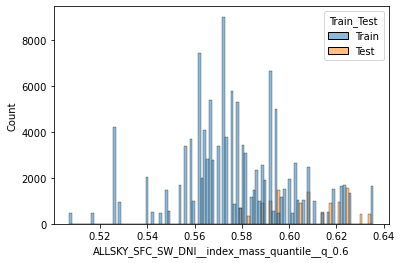

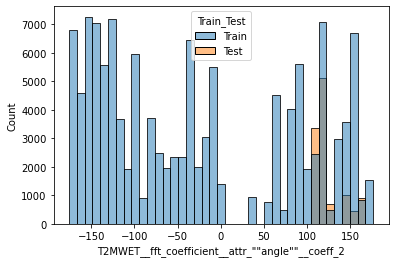

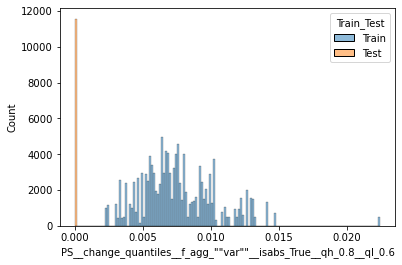

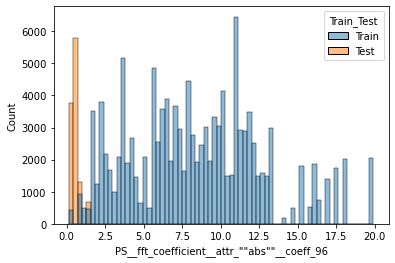

In [297]:
for col in data.select_dtypes(include=np.number).columns.tolist():
    plt.figure()
    sns.histplot(data=data, x=col, hue="Train_Test")